# CalCoFi

April,2025

### Introduction of the dataset and the problem

[CalCoFi](https://calcofi.org/) (California Cooperative Oceanic Fisheries Investigations) is one of the the world's longest-running and most comprehensive marine ecosystem monitoring programs. It spans over 70 years of continuous observations in the California Current System, a critical eastern boundary upwelling ecosystem that supports rich biodiversity and fisheries.

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The problem consists of predicting the temperature and Salinity based on various environmental factors, including depth, density, chemical concentrations, quarter of the year, wind speed and others.

Temperature and Salinity plays a crucial role in oceanography, as it directly affects water density, which drives ocean circulation, and influences the distribution of marine species. Many species are adapted to specific temperature and salinity ranges, making an understanding of temperature and salinity dynamics essential for predicting the impacts of environmental changes on marine ecosystems.

While temperature and salinity are interrelated, their relationship is complex and cannot be described by a single formula. However, there are physical models which describes the effects of temperature and salinity on seawater properties such as the Thermodynamic Equation of Seawater 2010 ([TEOS-10](https://www.teos-10.org/index.htm)), based on the Gibbs thermodinamical potential [determined](https://www.sciencedirect.com/science/article/pii/S0967063708001489) from experimental data of heat capacities, freezing points, vapour pressures and mixing heats at atmospheric pressure in the range −6 to 80 °C in temperature and 0–120 g kg–1 in absolute salinity.

<!-- In the following analysis i have used the dataset updated to [16 October 2023](https://calcofi.org/data/oceanographic-data/bottle-database/). -->

## Import 

In [5]:
from mymodule import *

## Data Cleaning and Exploratory Data Analysis

For this section i have inspired my analysis based on 2 notebook on kaggle: [Salinity CalCOFI Corr, Data Visual & Map](https://www.kaggle.com/code/asimislam/salinity-calcofi-corr-data-visual-map/notebook) and [TEMPERATURE-SALINITY+GEODATA](https://www.kaggle.com/code/angelosorge/temperature-salinity-geodata). 

I have loaded the useful data from "cast.csv" and "bottle.csv", the reason for these choices are explored in the notebook EDA.ipynb.

The Cast table contains metadata. This table includes date, time, latitude, longitude, weather, etc. for each CTD cast ever completed on a CalCOFI cruise. Each row is a unique cast, numbered sequentially/indexed by the “Cst_Cnt” column.

The Bottle table contains oceanographic data, it includes oceanographic measurements for each bottle/sampling depth ever completed on a CalCOFI cruise. There are additional data code and precision columns describing the quality of each oceanographic measurement. Each row is a unique bottle/sampling depth, numbered sequentially/indexed by the “Btl_Cnt” column. This table is much larger than the Cast table because each cast can have up to 24 bottles/sampling depths.

The Bottle table also has a “Cst_Cnt” column, which can be used as a unifier between the two tables.

The data and information can be found [here](https://www.kaggle.com/datasets/sohier/calcofi/) while the description of the columns [here](https://new.data.calcofi.com/index.php/database/calcofi-database/bottle-field-descriptions).

In [26]:
# bottle.csv contains information on ocean conditions
# cast.csv   contains information on collecting stations
# Load relevant columns from cast.csv
bottle_cols = ["Cst_Cnt", "Depthm", "T_degC", "Salnty","O2ml_L", "STheta","RecInd"]
cast_cols = ["Cst_Cnt","Quarter","Lat_Dec", "Lon_Dec", "Bottom_D","Wind_Spd"]

bottle = pd.read_csv("../data/bottle.csv", usecols=bottle_cols, encoding="ISO-8859-1")
cast = pd.read_csv("../data/cast.csv", usecols=cast_cols, encoding="ISO-8859-1")

# 3. Merge the datasets on "Cst_Cnt"
df = pd.merge(bottle, cast, on="Cst_Cnt", how="inner")

# Drop rows with missing values (around 29% of the data, we still have lots of data)
df.dropna(inplace=True)

# Remove low-quality codes 4 =  "Educated office guess (ghost)" and 6 = "Duplicate Depth"
df = df[~df["RecInd"].isin([4, 6])]

# remove RecInd and Csn_Cnt column, not needed for analysis 
df.drop(columns=["RecInd","Cst_Cnt"], inplace=True) # Drop RecInd column

In [7]:
# Quick look at the merged data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 606502 entries, 3771 to 864862
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Depthm    606502 non-null  int64  
 1   T_degC    606502 non-null  float64
 2   Salnty    606502 non-null  float64
 3   O2ml_L    606502 non-null  float64
 4   STheta    606502 non-null  float64
 5   Quarter   606502 non-null  int64  
 6   Lat_Dec   606502 non-null  float64
 7   Lon_Dec   606502 non-null  float64
 8   Bottom_D  606502 non-null  float64
 9   Wind_Spd  606502 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 50.9 MB
None


In [8]:
# Statistical description of the dataset
print("Principal Statistics:")
display(df.describe())

Principal Statistics:


,Depthm,T_degC,Salnty,O2ml_L,STheta,Quarter,Lat_Dec,Lon_Dec,Bottom_D,Wind_Spd
count,606502.000000,606502.000000,606502.00000,606502.000000,606502.000000,606502.000000,606502.000000,606502.000000,606502.000000,606502.000000
mean,216.584770,10.924221,33.83422,3.404041,25.799202,2.392991,31.827522,-120.193865,2607.204402,11.545850
std,305.589543,4.191757,0.45953,2.064225,1.004059,1.102267,3.518234,3.976389,1498.183244,6.762529
min,0.000000,1.440000,29.40200,-0.010000,20.996000,1.000000,18.416666,-157.983333,7.000000,0.000000
25%,49.000000,7.840000,33.48000,1.410000,24.951000,1.000000,30.200000,-122.400000,1165.000000,6.000000
50%,125.000000,10.150000,33.85600,3.440000,25.979000,2.000000,32.418333,-120.253333,3164.000000,11.000000
75%,296.000000,13.970000,34.18400,5.510000,26.629000,3.000000,33.721666,-117.908333,3977.000000,16.000000
max,5351.000000,31.140000,37.03400,11.130000,28.049000,4.000000,47.916666,-106.116666,7864.000000,71.000000


The following plot is taken from Kaggle: [TEMPERATURE-SALINITY+GEODATA](https://www.kaggle.com/code/angelosorge/temperature-salinity-geodata)

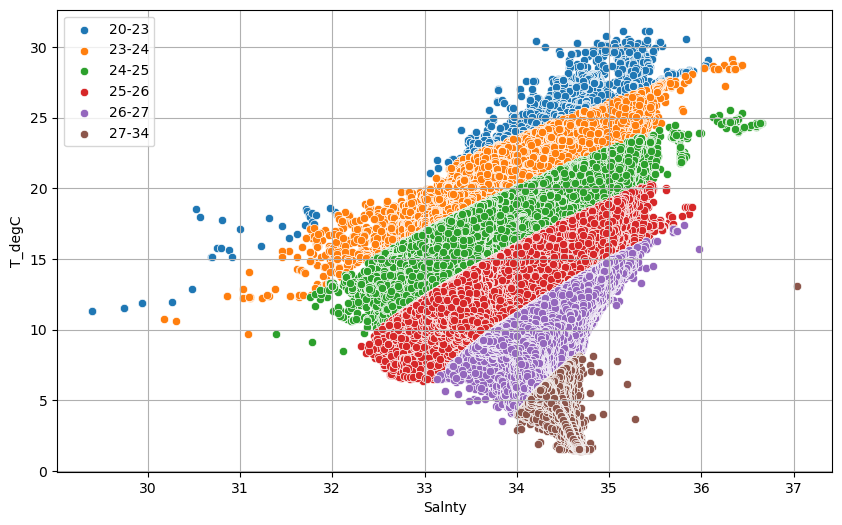

In [9]:
# Plot from the TEMPERATURE-SALINITY+GEODATA notebook on Kaggle
theta_step=[20,23,24,25,26,27,34]
plt.rcParams['figure.figsize']=10,6

for theta1, theta2 in zip(theta_step, theta_step[1:]):
    bottle_stheta=df[(df['STheta']>=theta1) & (df['STheta']<theta2)]
    sns.scatterplot(data=bottle_stheta,y='T_degC',x='Salnty',label=str(theta1)+'-'+str(theta2))
   
plt.grid()


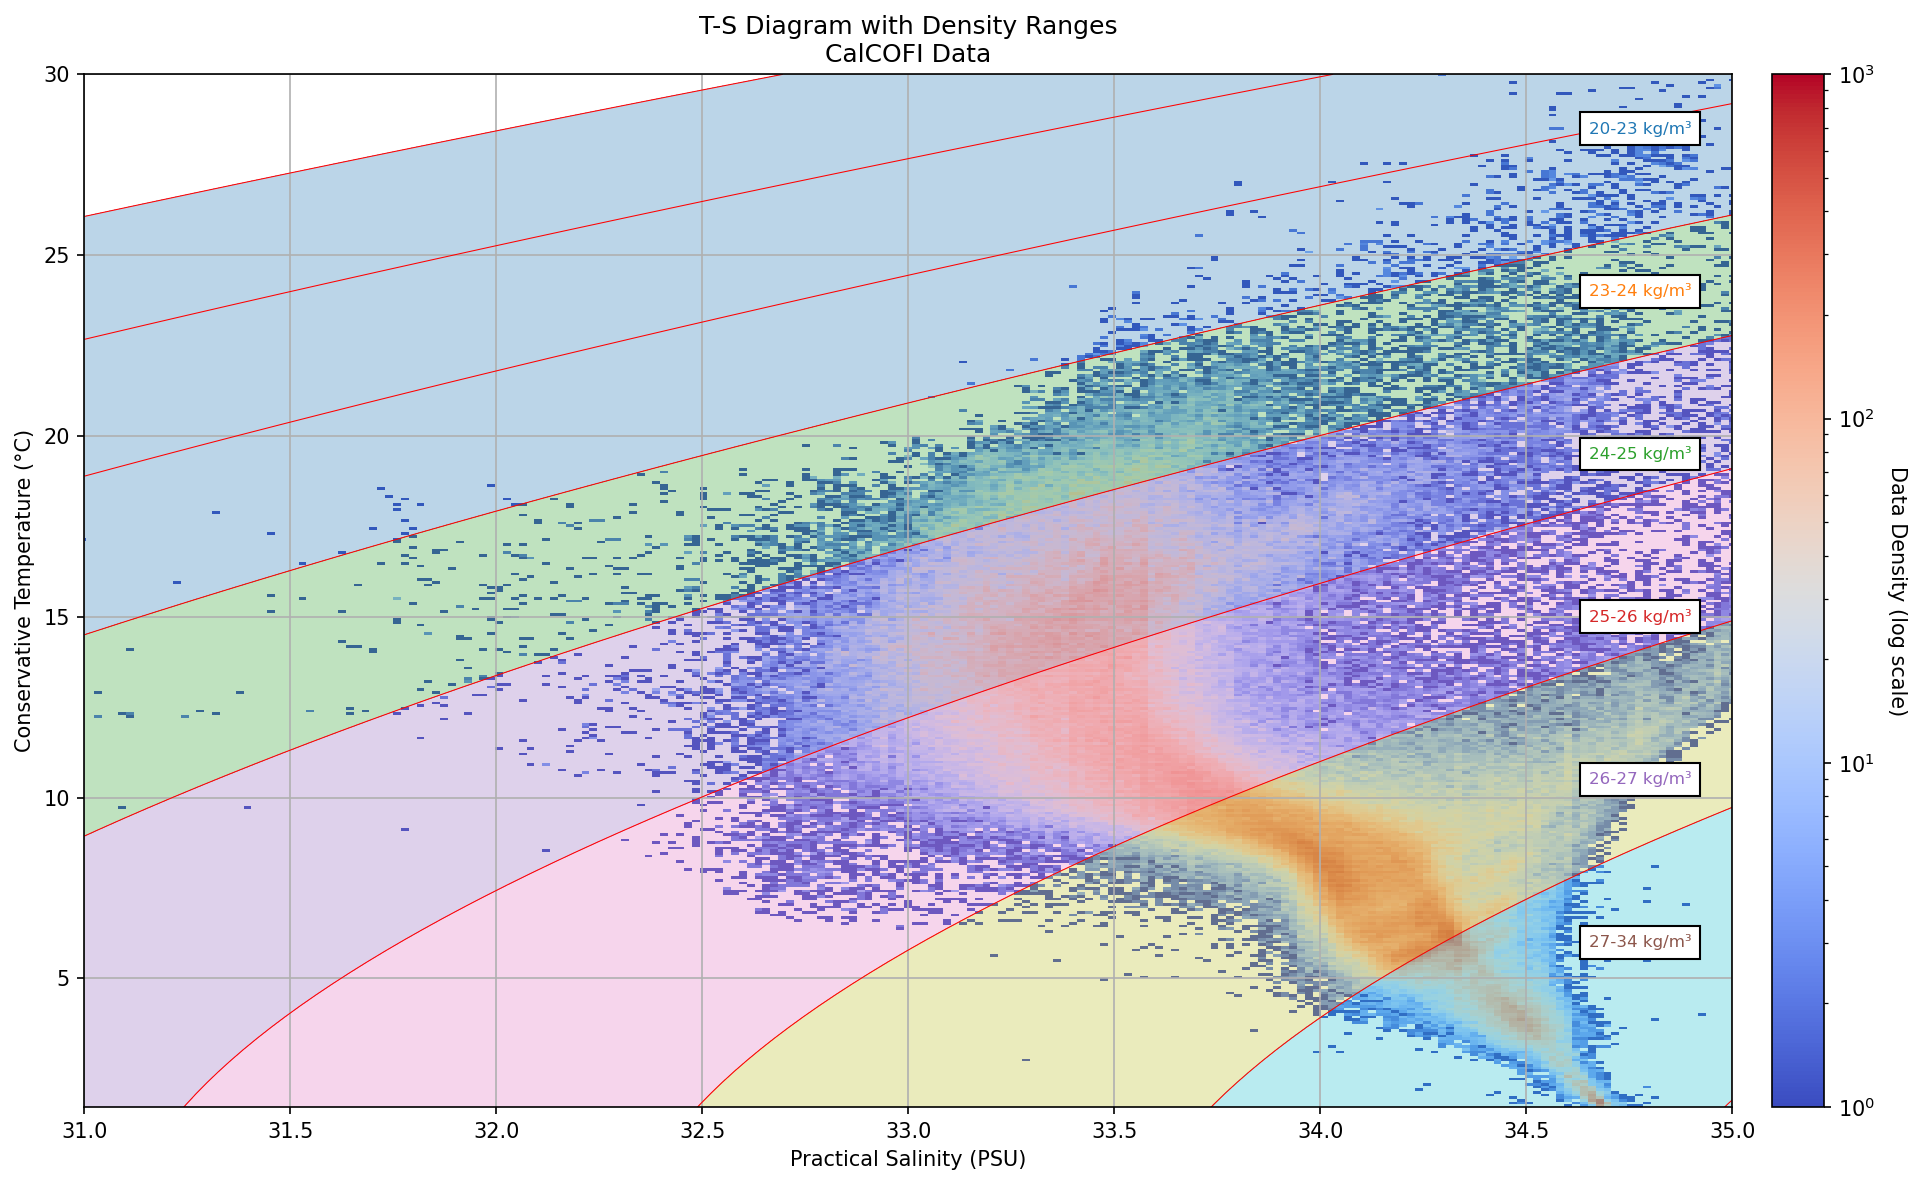

In [10]:
# Faster plotting with 2D histogram instead of scatterplot

# Calculate TEOS-10 variables (Absolute Salinity, Conservative Temperature, and potential density)
SA = gsw.SA_from_SP(df['Salnty'], df['Depthm'], df['Lon_Dec'], df['Lat_Dec'])
CT = gsw.CT_from_t(SA, df['T_degC'], df['Depthm'])
sigma_theta = gsw.sigma0(SA, CT)  # Potential density

# Define density (sigma-theta) ranges to highlight
theta_steps = [20, 23, 24, 25, 26, 27, 34]

# Create figure
plt.figure(figsize=(14, 8), dpi=150)
ax = plt.gca()

#  Plot 2D histogram (data density)
h = ax.hist2d(
    x=df['Salnty'],
    y=df['T_degC'],
    bins=(400, 400),  # Reduced for better performance
    cmap= 'coolwarm',
    norm=LogNorm(vmin=1, vmax=1000),
    cmin=1,
    zorder=0
)

# Add density contours
sal_vals = np.linspace(31, 35, 100)
temp_vals = np.linspace(0, 30, 100)
S, T = np.meshgrid(sal_vals, temp_vals)

# Calculate potential density for grid
SA_grid = gsw.SA_from_SP(S, 0, -124, 34)  # Position fixed for CalCOFI
CT_grid = gsw.CT_from_t(SA_grid, T, 0)
sigma_grid = gsw.sigma0(SA_grid, CT_grid)

# Contour lines for general density
cs = ax.contour(
    S, T, sigma_grid,
    levels=np.arange(20, 30, 1),
    colors='red',
    linewidths=0.5,
    alpha=1,
    # zorder=1
)

# Highlight specific density ranges with filled contours
theta_steps = sorted(theta_steps)
cf = ax.contourf(
    S, T, sigma_grid,
    levels=theta_steps,
    colors=plt.cm.tab10(np.linspace(0,1,len(theta_steps)-1)),
    alpha=0.3,
    # hatches=['...', '+++', 'xxx', '///', '\\\\', 'ooo'],
    zorder=1 
)

# Add range labels
for i, (low, high) in enumerate(zip(theta_steps[:-1], theta_steps[1:])):
    ax.text(
        x=34.9, y=28.5-i*4.5,
        s=f'{low}-{high} kg/m³',
        color=plt.cm.tab10(i),
        fontsize=8,
        ha='right',
        va='center',
        bbox=dict(facecolor='white', alpha=1, edgecolor='black')
    )

# Formatting
ax.set_xlim(31, 35)
ax.set_ylim(df['T_degC'].min(), 30)
ax.set_xlabel('Practical Salinity (PSU)', fontsize=10)
ax.set_ylabel('Conservative Temperature (°C)', fontsize=10)
ax.set_title('T-S Diagram with Density Ranges\nCalCOFI Data', fontsize=12)

# Add colorbars
cbar_data = plt.colorbar(h[3], ax=ax, pad=0.02)
cbar_data.set_label('Data Density (log scale)', rotation=270, labelpad=15)

plt.grid()
plt.tight_layout()
plt.show()

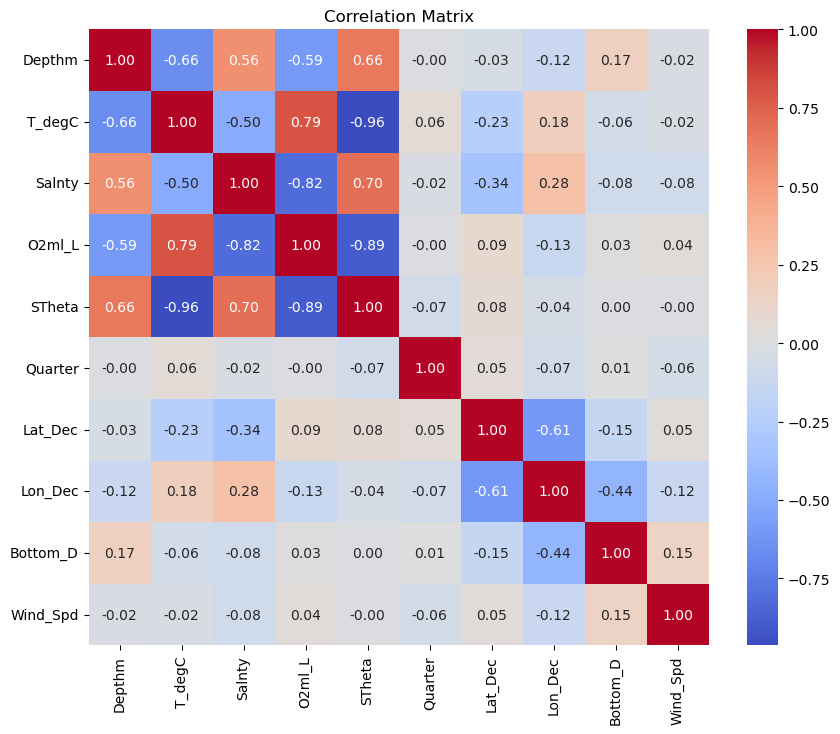

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Linear Regression

A **linear regression** is a **supervised learning algorithm** used for modeling the relationship between a dependent variable (label) $y \in \mathbb{R}^q$ and one or more independent variables (features) $\bold{x}\in \mathbb{R}^p$. Given a dataset

$$ \mathbf{D} = \{ ( \bold{y}_i, \bold{x}_i ) : \bold{y}_i \in \mathbb{R}^q, \bold{x}_i \in \mathbb{R}^p ,  i=1, \dots, N \}, $$

where $N$ is the number of data points, $\bold{y}_i$​ represents the observed label vector of dimension $q$ for the $i$-th data point, and $\bold{x}_i$
​is the corresponding feature vector of dimension $p$ for the $i$-th data point, linear regression seeks to find a linear function that best predicts $\bold{y}$ from $\bold{x}$.

The model estimates the relationship between the label and the features as: 

$$ \hat{\bold{y}}^T(\bold{x},\boldsymbol{\beta_0},\boldsymbol{\beta}) = \boldsymbol{\beta_0}^T + \bold{x}^T \boldsymbol{\beta}, $$

where $\boldsymbol{\beta_0}\in \mathbb{R}^q$ is a vector of intercepts(also known as the biases), and $\boldsymbol{\beta} \in \mathbb{R}^{p\times q}$ is the matrix of regression coefficients (also known as weights). The term $\hat{\bold{y}}^T(\bold{x},\boldsymbol{\beta_0},\boldsymbol{\beta})$ represents the predicted values for $\bold{y}$ given the feature vector $\bold{x}$.

To evaluate how well the model predicts the dataset, we need a loss function that quantifies the difference between the predicted values $\hat{ \bold{y}}$ and the actual observed values $\bold{y}$. In linear regression, the most common loss function is the **Ordinary Least Squares (OLS)** loss function, which minimizes the squared differences between the predicted and true values:

$$ l(\bold{y}, \hat{\bold{y}}) = (\bold{y} - \hat{ \bold{y} })^2 = (\bold{y} - \boldsymbol{\beta_0} - \boldsymbol{\beta}^T\bold{x})^2.$$

which is a sum of independent OLS cost function for each label q, the goal is to find the values of the parameters $​\boldsymbol{\beta_0}$ and $\boldsymbol{\beta}$ that minimize this loss function over all data points in the dataset $\mathbf{D}$.

$$ \boldsymbol{\tilde \beta} = (\boldsymbol{\beta_0}, \boldsymbol{\beta})^T = \argmin_{\boldsymbol{\tilde \beta}^*} (\bold{y} - \bold{X}\boldsymbol{\beta})^T(\bold{y} - \bold{X}\boldsymbol{\beta}),$$

with $\bold{X}$ the design matrix and $\bold{Y}$ the matrix of labels.

$$
  \mathbf{X} = \begin{bmatrix}
  1 & \bold{x}_1^{T} \\
  1 & \bold{x}_2^{T} \\
  \vdots & \vdots \\
  1 & \bold{x}_N^{T}
  \end{bmatrix},

  \quad \quad 

  \mathbf{Y} = \begin{bmatrix}
  \bold{y}_1^{T} \\
  \bold{y}_2^{T} \\
  \vdots \\
  \bold{y}_N^{T}
  \end{bmatrix}.

$$

The solution to the **OLS Linear Regression** is given by:

$$\boldsymbol{\tilde{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}.$$

In this analysis we have $p=8$ and $q=2$.

,T_degC,Salnty
Intercept,10.928,33.834
Depthm,-0.200,0.074
O2ml_L,-0.780,-0.341
STheta,-4.554,-0.021
Bottom_D,-0.288,-0.071
Wind_Spd,-0.025,-0.006
Lat_Dec,-0.624,-0.146
Lon_Dec,-0.048,-0.027
Quarter,-0.018,-0.004


Mean Squared Error (Train): 0.3090629538605433
Mean Squared Error (Test): 0.3080791544628713


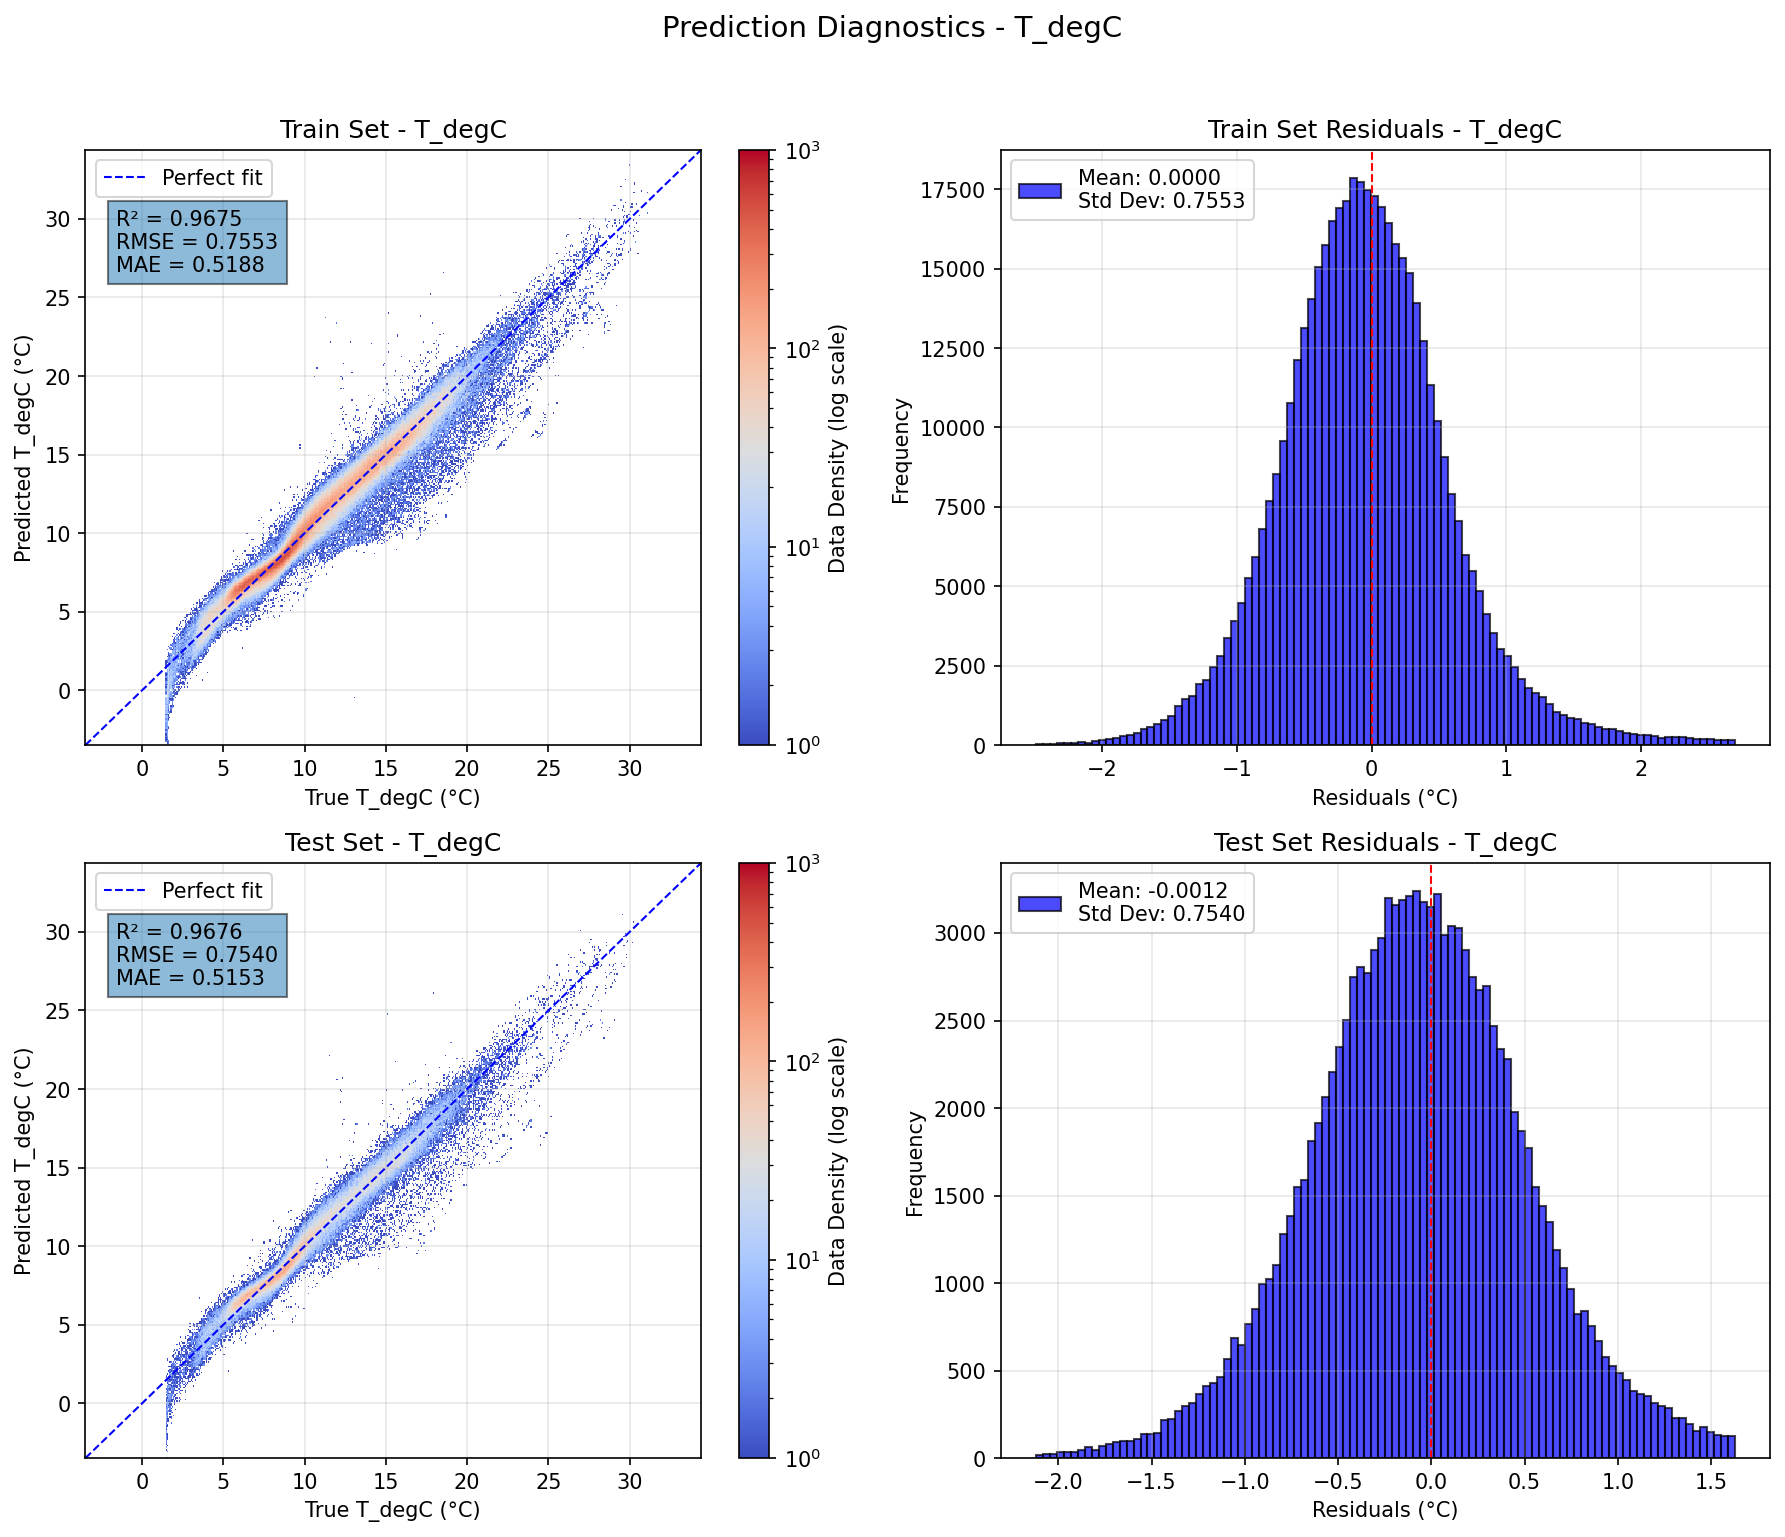

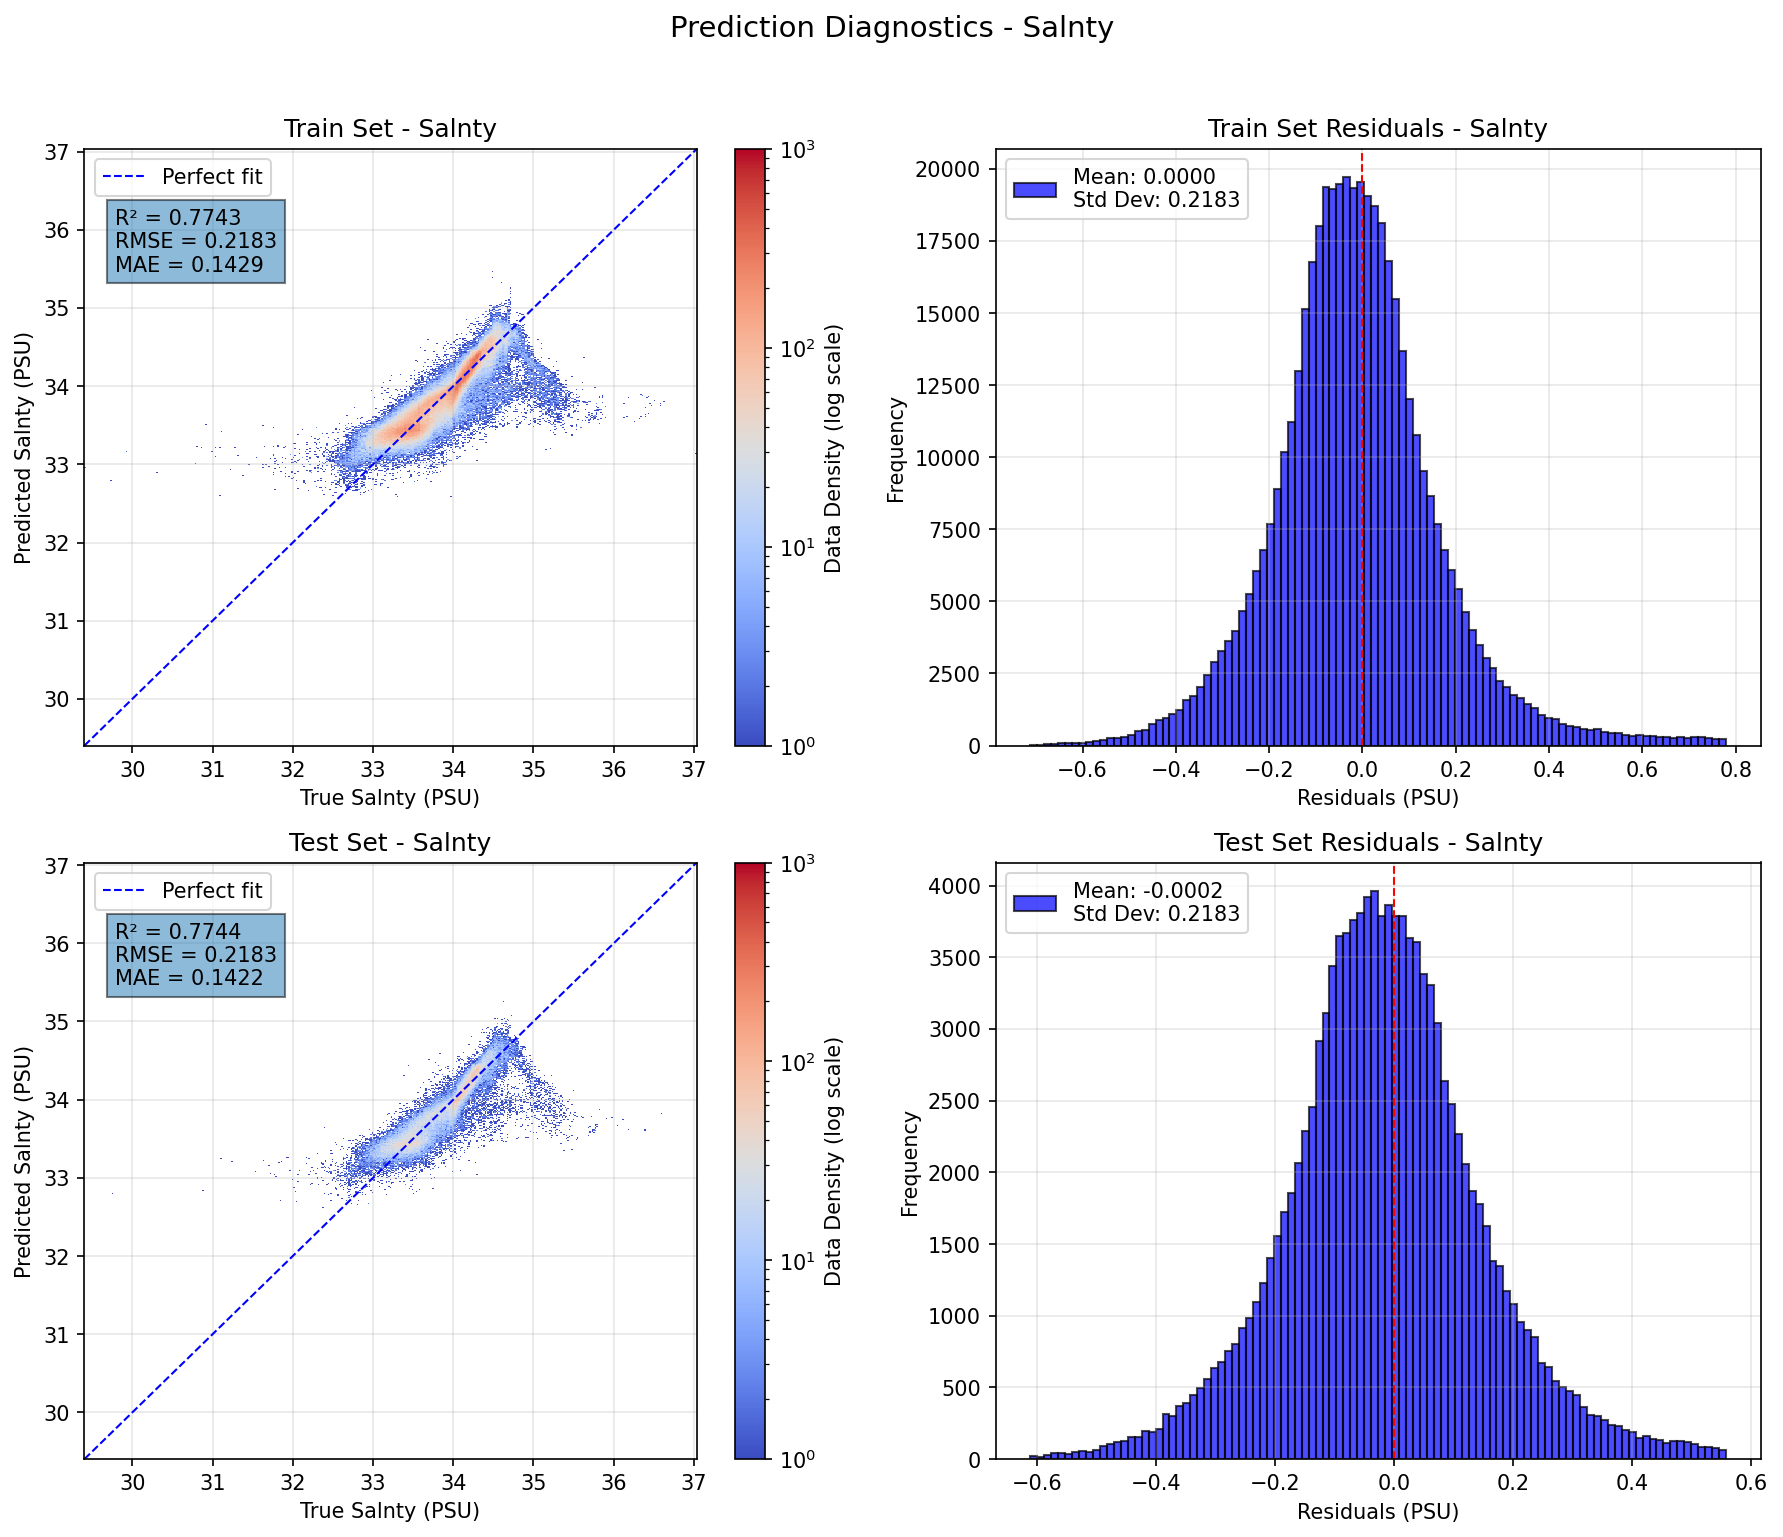

In [27]:
# Define features and targets
features = ["Depthm", "O2ml_L", "STheta", "Bottom_D", "Wind_Spd", "Lat_Dec", "Lon_Dec", "Quarter"]
targets = ["T_degC", "Salnty"]

# Prepare data
X_train, X_test, y_train, y_test = prepare_data(df, features, targets)

# Train model using normal equation of multivariate linear regression
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train.values

# Print coefficients and associate them with feature names
coefficients = pd.DataFrame(beta, columns=targets, index=["Intercept"] + features)

# Display the coefficients
display(coefficients)

# # Predictions
y_pred_train = X_train @ beta
y_pred_test = X_test @ beta

print("Mean Squared Error (Train):", mean_squared_error(y_train, y_pred_train))
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_pred_test))

# Generate visualizations
create_prediction_figure(y_train, y_pred_train, y_test, y_pred_test, targets)

Let's see what happens to the predictions if we remove features highly and poorly correlated to the temperature

In [13]:
# Original feature set
original_features = ['Depthm', 'O2ml_L', 'STheta', 'Bottom_D', 
                     'Wind_Spd', 'Lat_Dec', 'Lon_Dec', 'Quarter']

# Define feature groups to exclude
cases = [
    ('All Features', []),
    ('Exclude Spatial', ['Lat_Dec', 'Lon_Dec']),
    ('Exclude Wind Speed', ['Wind_Spd']),
    ('Exclude Bottom Depth', ['Bottom_D']),
    ('Exclude Quarter', ['Quarter']),
    ('Exclude Oxygen', ['O2ml_L']),
    ('Exclude Density', ['STheta'])
]

# Define targets (temperature and salinity)
targets = ["T_degC", "Salnty"]

# Run analysis
results_df = analyze_feature_cases(df, original_features, cases, targets)


# Format and display results
pd.options.display.float_format = '{:.3f}'.format
print("\nFeature Set Performance Comparison:")
display(results_df[[
    'Case', 'Features Used',
    'Temp Test R²', 'Temp Test RMSE',
    'Sal Test R²', 'Sal Test RMSE'
]])


Feature Set Performance Comparison:


,Case,Features Used,Temp Test R²,Temp Test RMSE,Sal Test R²,Sal Test RMSE
0,All Features,8,0.968,0.754,0.774,0.218
1,Exclude Spatial,6,0.951,0.926,0.709,0.248
2,Exclude Wind Speed,7,0.968,0.754,0.774,0.218
3,Exclude Bottom Depth,7,0.965,0.783,0.761,0.224
4,Exclude Quarter,7,0.968,0.754,0.774,0.218
5,Exclude Oxygen,7,0.962,0.817,0.683,0.259
6,Exclude Density,7,0.794,1.902,0.774,0.218


As expected, if we remove highly correlated features such as Density, the prediction suffers noticeably, while removing poorly correlated features such as wind speed, bottom depth, Quarter and spatial dependence the linear regression does not change significantly.

Small correlation means only that these features are not linearly correlated to temperature, they may have a non linear relationship with temperature which the linear regression does not capture.

### K-fold Cross validation

K-Fold is a cross-validation method used to assess the performance of a machine learning model. In particular, it helps to estimate how well the model generalizes to unseen data by splitting the dataset into multiple subsets (folds) and training and testing the model on different combinations of these subsets.

It splits your dataset into K equal parts (folds) and for each iteration:

1. Train on K-1 folds.

2. Validate on the remaining 1 fold.

3. Repeat K times, using each fold as the validation set once.

4. Average results across all folds to estimate model performance.

Here i'm using K-fold to estimate the average forecasting error, which is the prediction error averaged over the dataset. Since i have two outputs, the mean squared error was averaged for a single metric.

In [14]:
# ====================================================
# MANUAL K-FOLD CROSS VALIDATION (using normal equation)
# ====================================================

K = 50  # Number of folds

X_train = df[features].values  # shape (n_samples, n_features)
y_train = df[targets]  # shape (n_samples, n_targets)

X_train = np.c_[np.ones(len(df)), df[features].values]  # Add intercept column

# We'll perform 5-fold CV on the training set
kf = KFold(n_splits=K, shuffle=True, random_state=42)
manual_fold_errors = []  # list to store MSE for each fold

# For each fold, use indices to select training and validation subsets.
for train_index, val_index in kf.split(X_train):
    # Select fold data: note that X_train is already a NumPy array (after scaling and adding intercept)
    X_train_fold = X_train[train_index]
    X_val_fold = X_train[val_index]
    # For y, convert to numpy array to use indexing (if not already an array)
    y_train_fold = y_train.values[train_index]  # shape (n_samples, n_targets)
    y_val_fold = y_train.values[val_index]
    
    # Compute beta using the normal equation on the training fold:
    # beta = (Xᵀ * X)^(-1) * Xᵀ * y
    beta_fold = np.linalg.inv(X_train_fold.T @ X_train_fold)@ X_train_fold.T @ y_train_fold
    
    # Predict on the validation fold:
    y_val_pred = X_val_fold @ beta_fold  # shape (n_val_samples, n_targets)
    
    # Compute mean squared error for this fold.
    # For multioutput, mean_squared_error will average errors over all targets.
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    manual_fold_errors.append(fold_mse)

# Compute the generalized error as the average MSE across folds:
generalized_error_manual = np.mean(manual_fold_errors)
print("Manual K-fold CV estimate of the mean forecast error:", generalized_error_manual)

# ====================================================
# SKLEARN CROSS-VALIDATION
# ====================================================

reg = LinearRegression(fit_intercept=False)

# Use cross_val_score with negative MSE scoring.
# The X_train and y_train passed here must be in the correct shape.
cv = KFold(n_splits=K, shuffle=True, random_state=42)  # Match manual setup
cv_scores = cross_val_score(reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# cross_val_score returns negative MSE values (because higher scores are better),
# so we take the negative of the mean to get the average MSE.
generalized_error_sklearn = - np.mean(cv_scores)
print("Sklearn K-fold CV estimate of the mean forecast error:", generalized_error_sklearn)

Manual K-fold CV estimate of the mean forecast error: 0.3088844879934317
Sklearn K-fold CV estimate of the mean forecast error: 0.3088844879934619


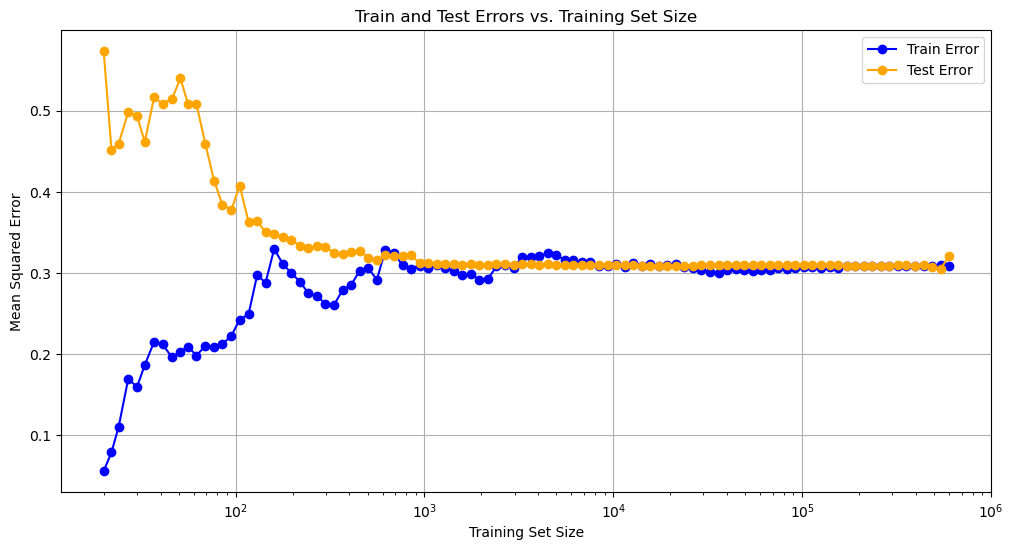

In [15]:
# since we have a large dataset, we can also study how the number of training samples affects the performance
# Define the total number of observations in the dataset
total_samples = len(df)

# Choose the number of training sizes (N points)
N = 100

min_train_size = 20
max_train_size = int(0.99 * total_samples)

# Generate logarithmically spaced training set sizes (rounded to integer values)
train_sizes = np.unique(np.geomspace(min_train_size, max_train_size, N).astype(int))

# Initialize lists to store results
train_errors = []
test_errors = []

# Loop over the selected training set sizes
for size in train_sizes:
    # Compute the test set fraction based on the chosen training size.
    # test_size is defined as the fraction of data reserved for testing.
    test_size_fraction = 1 - (size / total_samples)
    
    # prepare the data, splitting into training and test sets, scaling and adding intercept
    X_train, X_test, y_train, y_test = prepare_data(df, features, targets, test_size=test_size_fraction)
    
    # Compute the beta coefficients using the normal equation
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train.values
    
    # Compute predictions for training and test sets
    y_train_pred = X_train @ beta
    y_test_pred  = X_test @ beta
    
    # Calculate the mean squared errors for both sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test, y_test_pred)
    
    # Record the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot training and test error as a function of the training set size
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_errors, marker='o', label='Train Error', color='blue')
plt.plot(train_sizes, test_errors, marker='o', label='Test Error', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. Training Set Size')
plt.legend()
plt.grid(True)

plt.xscale('log')
plt.show()

The linear model seems very robust, even with a very small training dataset $\approx 100$, testing against $\approx 10^5$ test data did not result in a very large generalization error.

## Ridge and LASSO regularization

**Ridge Regression** is a linear regression technique that introduces an $L^2$ regularization term to prevent overfitting, particularly in scenarios with many features or highly correlated features. The regularization term penalizes large regression coefficients, forcing the model to keep coefficients small and (ideally) improving generalization on unseen data.
The cost function to minimize in Ridge Regression is:

$$C(\boldsymbol{\beta}) = \sum_{i=1}^N (y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i - \beta_0)^2 + \lambda \|\boldsymbol{\beta}\|_2^2,$$

where $\lambda$ is the Regularization parameter (Lagrange Multiplier) controlling penalty strength and $\|\boldsymbol{\beta}\|_2^2$ is Squared L2-norm of coefficients. The penalty strength governs the bias-variance tradeoff between simplicity and expressivity of the model, the effective degree of freedom is given by: $$ dof(\lambda) = \sum_{i=1}^{p} \frac{\sigma_i^2}{\sigma_i^2 + \lambda},$$
where $p$ is the number of features, i.e. the dimension of the feature vector $\vec x$ and $\sigma_i$ are the singular values of the design matrix $\bold X \in \mathbb{R}^{N+1} \times \mathbb{R}^{p}$ 

The optimal coefficients are given by: 

$$ \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y},$$

**LASSO (Least Absolute Shrinkage and Selection Operator)** regression is another linear regression technique that uses an $L^1$ regularization term instead of $L^2$, leading to sparse solutions, i.e., some coefficients become exactly zero. This makes LASSO particularly useful for feature selection because it effectively reduces the number of features in the model. The cost function for LASSO regression is:

$$ C(\boldsymbol{\beta}) = \sum_{i=1}^N (y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i - \beta_0)^2 + \lambda \|\boldsymbol{\beta}\|_1,$$

where $\|\boldsymbol{\beta}\|_1$​ is the $L^1$-norm of the coefficients, which is the sum of the absolute values of the coefficients. The $L^1$ penalty encourages sparsity, forcing some of the coefficients to shrink exactly to zero, effectively removing them from the model.

The optimal coefficients in LASSO regression are obtained by minimizing this cost function. Closed-form solutions are not available for LASSO in general unlike Ridge.

## GridSearch

In [16]:
# Define parameter grid
ridge_params = {'alpha': np.logspace(-3,-1, 15)}  # Test 25 values between 0.001 and 1000

# GridSearchCV with Ridge
ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',
    cv = 5, # 5-fold cross-validation
    n_jobs= 15  # Use all CPU cores minus one
)
ridge_grid.fit(X_train, y_train)

# Best model
best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge lambda: {ridge_grid.best_params_['alpha']:.4f}")

Best Ridge lambda: 0.0010


In [17]:
# Define parameter grid
lasso_params = {'alpha': np.logspace(-4, -2, 15)}  # Test 25 values between 1e-4 and 1e-1

# GridSearchCV with Lasso
lasso_grid = GridSearchCV(
    estimator=Lasso(max_iter=1000, tol=0.001,fit_intercept=True),  # Ensure convergence
    param_grid=lasso_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=15
)
lasso_grid.fit(X_train, y_train)

# Best model
best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso lambda: {lasso_grid.best_params_['alpha']:.4f}")

# takes ~30 seconds to run

Best Lasso lambda: 0.0001


In [18]:
# Extract Ridge results
ridge_results = pd.DataFrame(ridge_grid.cv_results_)
ridge_results['alpha'] = ridge_results['param_alpha'].astype(float)
ridge_results['RMSE'] = np.sqrt(-ridge_results['mean_test_score'])

# Extract Lasso results
lasso_results = pd.DataFrame(lasso_grid.cv_results_)
lasso_results['alpha'] = lasso_results['param_alpha'].astype(float)
lasso_results['RMSE'] = np.sqrt(-lasso_results['mean_test_score'])

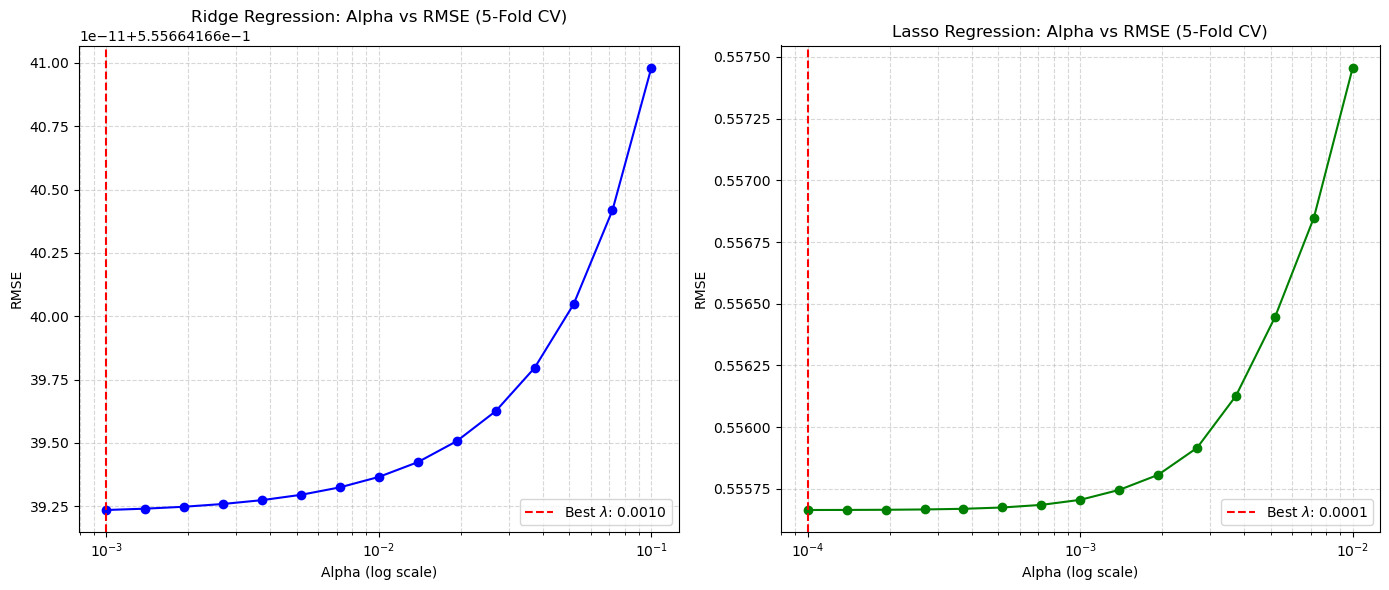

In [19]:
plt.figure(figsize=(14, 6))

# Ridge Regression Plot
plt.subplot(1, 2, 1)
plt.semilogx(ridge_results['alpha'], ridge_results['RMSE'], marker='o', linestyle='-', color='blue')
plt.axvline(ridge_grid.best_params_['alpha'], color='red', linestyle='--', label=f'Best $\lambda$: {ridge_grid.best_params_["alpha"]:.4f}')
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Ridge Regression: Alpha vs RMSE (5-Fold CV)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()

# Lasso Regression Plot
plt.subplot(1, 2, 2)
plt.semilogx(lasso_results['alpha'], lasso_results['RMSE'], marker='o', linestyle='-', color='green')
plt.axvline(lasso_grid.best_params_['alpha'], color='red', linestyle='--', label=f'Best $\lambda$: {lasso_grid.best_params_["alpha"]:.4f}')
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Lasso Regression: Alpha vs RMSE (5-Fold CV)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

These low values of $\lambda$ confirms that the linear regression is not overfitting the data, instead it is saying that the model is not expressive enough to describe the data further.

## Kernel Method

Since the linear model is too simplistic, we can use kernel methods to capture nonlinear relationships and improve temperature prediction accuracy. This approach will better make use of features like wind speed, bottom depth, seasonal variation (quarter of the year), and geolocation data, which have not played a significant role so far.

The main idea of Kernel Linear Regression is to extend the Linear Regression to capture non linear relationships:

$$ \bold{y}^T = \bold{x}^T\boldsymbol{\beta}  \to \bold{h}^T \boldsymbol{\beta}  \qquad \text{with} \qquad\bold{h} = \begin{bmatrix}
\phi_1(\bold{x})\\
\vdots\\
\phi_p(\bold{x})
\end{bmatrix}, \boldsymbol{\beta} \in \mathbf{R}^{p\times q}.$$ 

But computing the transformation into a high-dimensional feature space can be computationally. The kernel trick addresses this issue by implicitly mapping the original input features into a higher-dimensional space by leveraging kernel functions (e.g., the **radial basis function (RBF)**, **polynomial kernels**, etc.) that compute inner products in the feature space directly:

$$ K(\bold{x},\bold{y})=\langle \phi(\bold{x}),\phi(\bold{y})\rangle .$$

While the kernel trick offers significant benefits in terms of flexibility and capturing non-linear relationships, it also brings computational and memory challenges, especially with large datasets like the CalCoFI dataset containing $600k$ data points, where such a method becomes prohibitive in terms of memory and computational time.

In kernel-based algorithms, one of the core computations involves forming a kernel matrix. For a dataset with N observations, this matrix is of size $N×N$ With $600k$ data points, this matrix has 360 billion (600,000²) entries:

$$3.6 \cdot10^{11}\times 8 \text{ B} \approx 2.88 \text{ TB} \quad \text{are needed to store this matrix.}$$

With some limitations we can still use Kernel Methods in regularized linear regression (e.g., Ridge regression).
Here the model is trained by minimizing a cost function that includes a regularization term to prevent overfitting. The optimal solution for the parameters $\boldsymbol{\beta}$ can be expressed in terms of the kernel $K$ of size $N\times N$ with $N$ being the training dataset dimension. The prediction for a new point $\boldsymbol{x}$ is given by:

$$
\hat{\bold{y}} = \hat{f}(\boldsymbol{x}) = \sum_{i=1}^{N} \boldsymbol{\beta}_i K(\boldsymbol{x}_i, \boldsymbol{x}),
$$

where $\boldsymbol{x}_i$ are the training data and $\beta_i$ are the optimized coefficients:

$$
\boldsymbol{\beta} = (K + \lambda \mathbb{I}_{N\times N})^{-1} Y,
$$

where $Y$ are the training labels, and the prediction becomes


$$
\hat{\bold{y}} = \sum_{i=1}^{N} K(\boldsymbol{x}_i, \boldsymbol{x}_j)(K + \lambda \mathbb{I}_{N\times N})^{-1}_{j,k} \bold{y}_k \quad \text{with} \quad[K]_{ij} = K(\boldsymbol{x}_i, \boldsymbol{x}_j).
$$

Using a kernel allows for modeling complex nonlinear relationships, but it requires careful selection of the kernel itself. Some common kernels include:

- The **polynomial kernel**: $K_n(\boldsymbol{x}_a, \boldsymbol{x}_b) = (1 + \boldsymbol{x}_a^T \boldsymbol{x}_b)^n$, which generates a space of degree-$n$ polynomials
- The **Gaussian kernel**: $K_\gamma(\boldsymbol{x}_a, \boldsymbol{x}_b) = \exp\left(-\gamma ||\boldsymbol{x}_a - \boldsymbol{x}_b||^2 \right)$, which can approximate arbitrary functions with a suitable choice of the parameter $\gamma$.

## Polynomial Kernel

To use the kernel trick we need to computer the Kernel Matrix for the training set and test set, which has dimension $N_{train} \times N_{train}$,$N_{test} \times N_{test}$ both prohibitive to keep in memory when the dataset is very large.
The [Nyström approximation](https://link.springer.com/chapter/10.1007/11503415_22) can allow a significant speed-up of the computations.
This speed-up is achieved by using, instead of the kernel matrix, its approximation $\tilde{K}$  of rank $d=n\_component$. An advantage of the method is that it is not necessary to compute or store the whole kernel matrix, but only a submatrix of size $d \times N$.

The general kernel method has storage and computational cost required to find the solution of the problem of order $O(D^{2})$ and $O(D^{3})$ respectively, the approximation reduces to $O(Dd)$ and $O(Dd^{2})$.

In the following analysis d=500, so that the required memory to store this matrix is accessible.

$$ 3\cdot10^{5} \times 500 \times 8 \text{ B} = 1.2 \text{ GB}$$


Shape of X_train : (303251, 9)
Mean Squared Error (Train): 0.12467491950151313
Mean Squared Error (Test): 0.1299888852585443


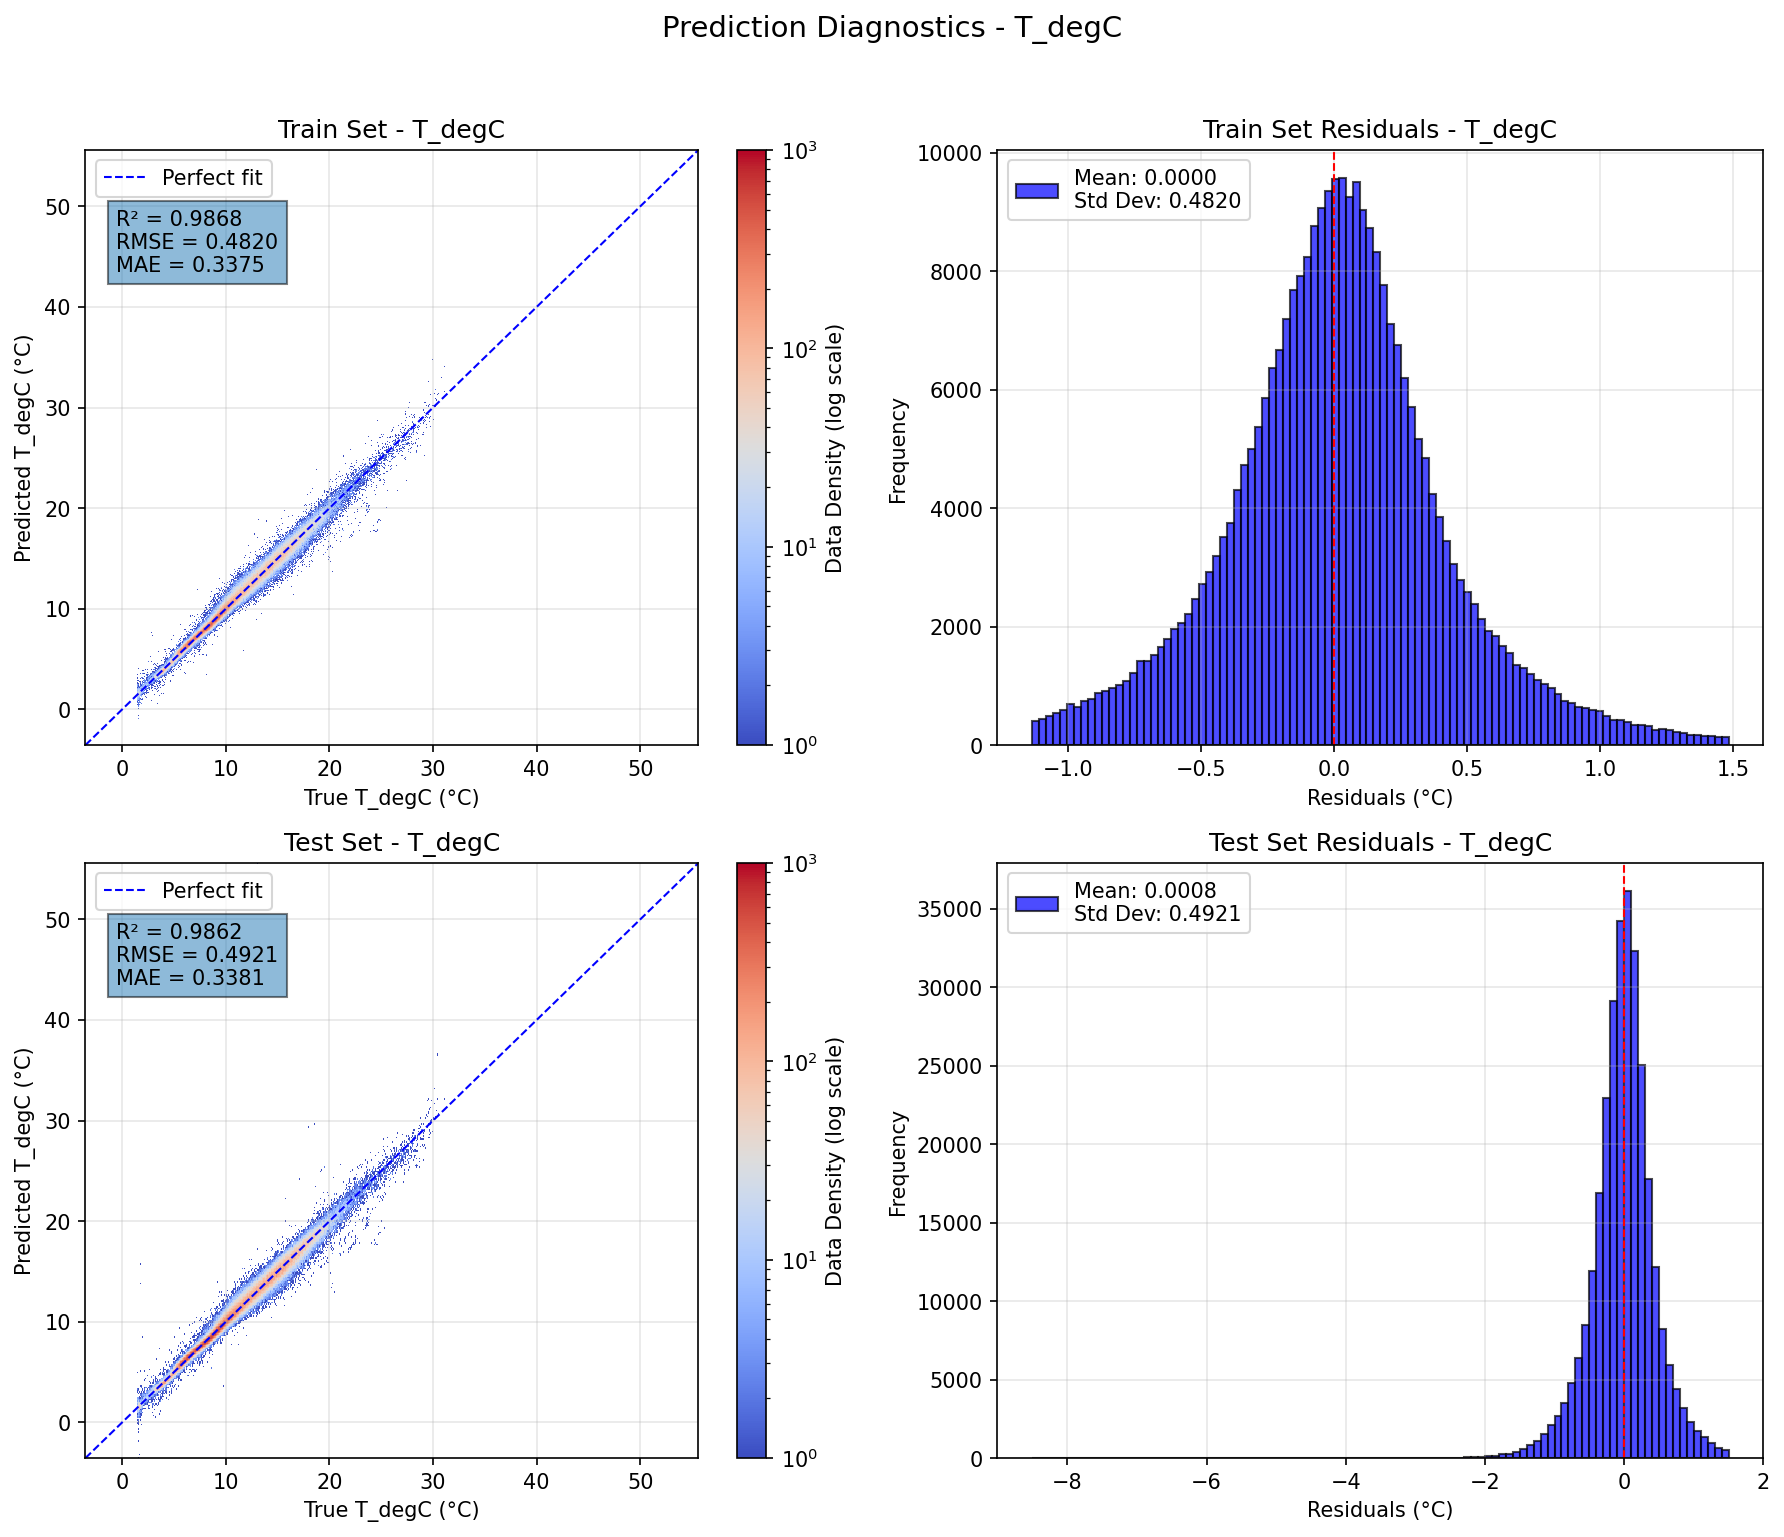

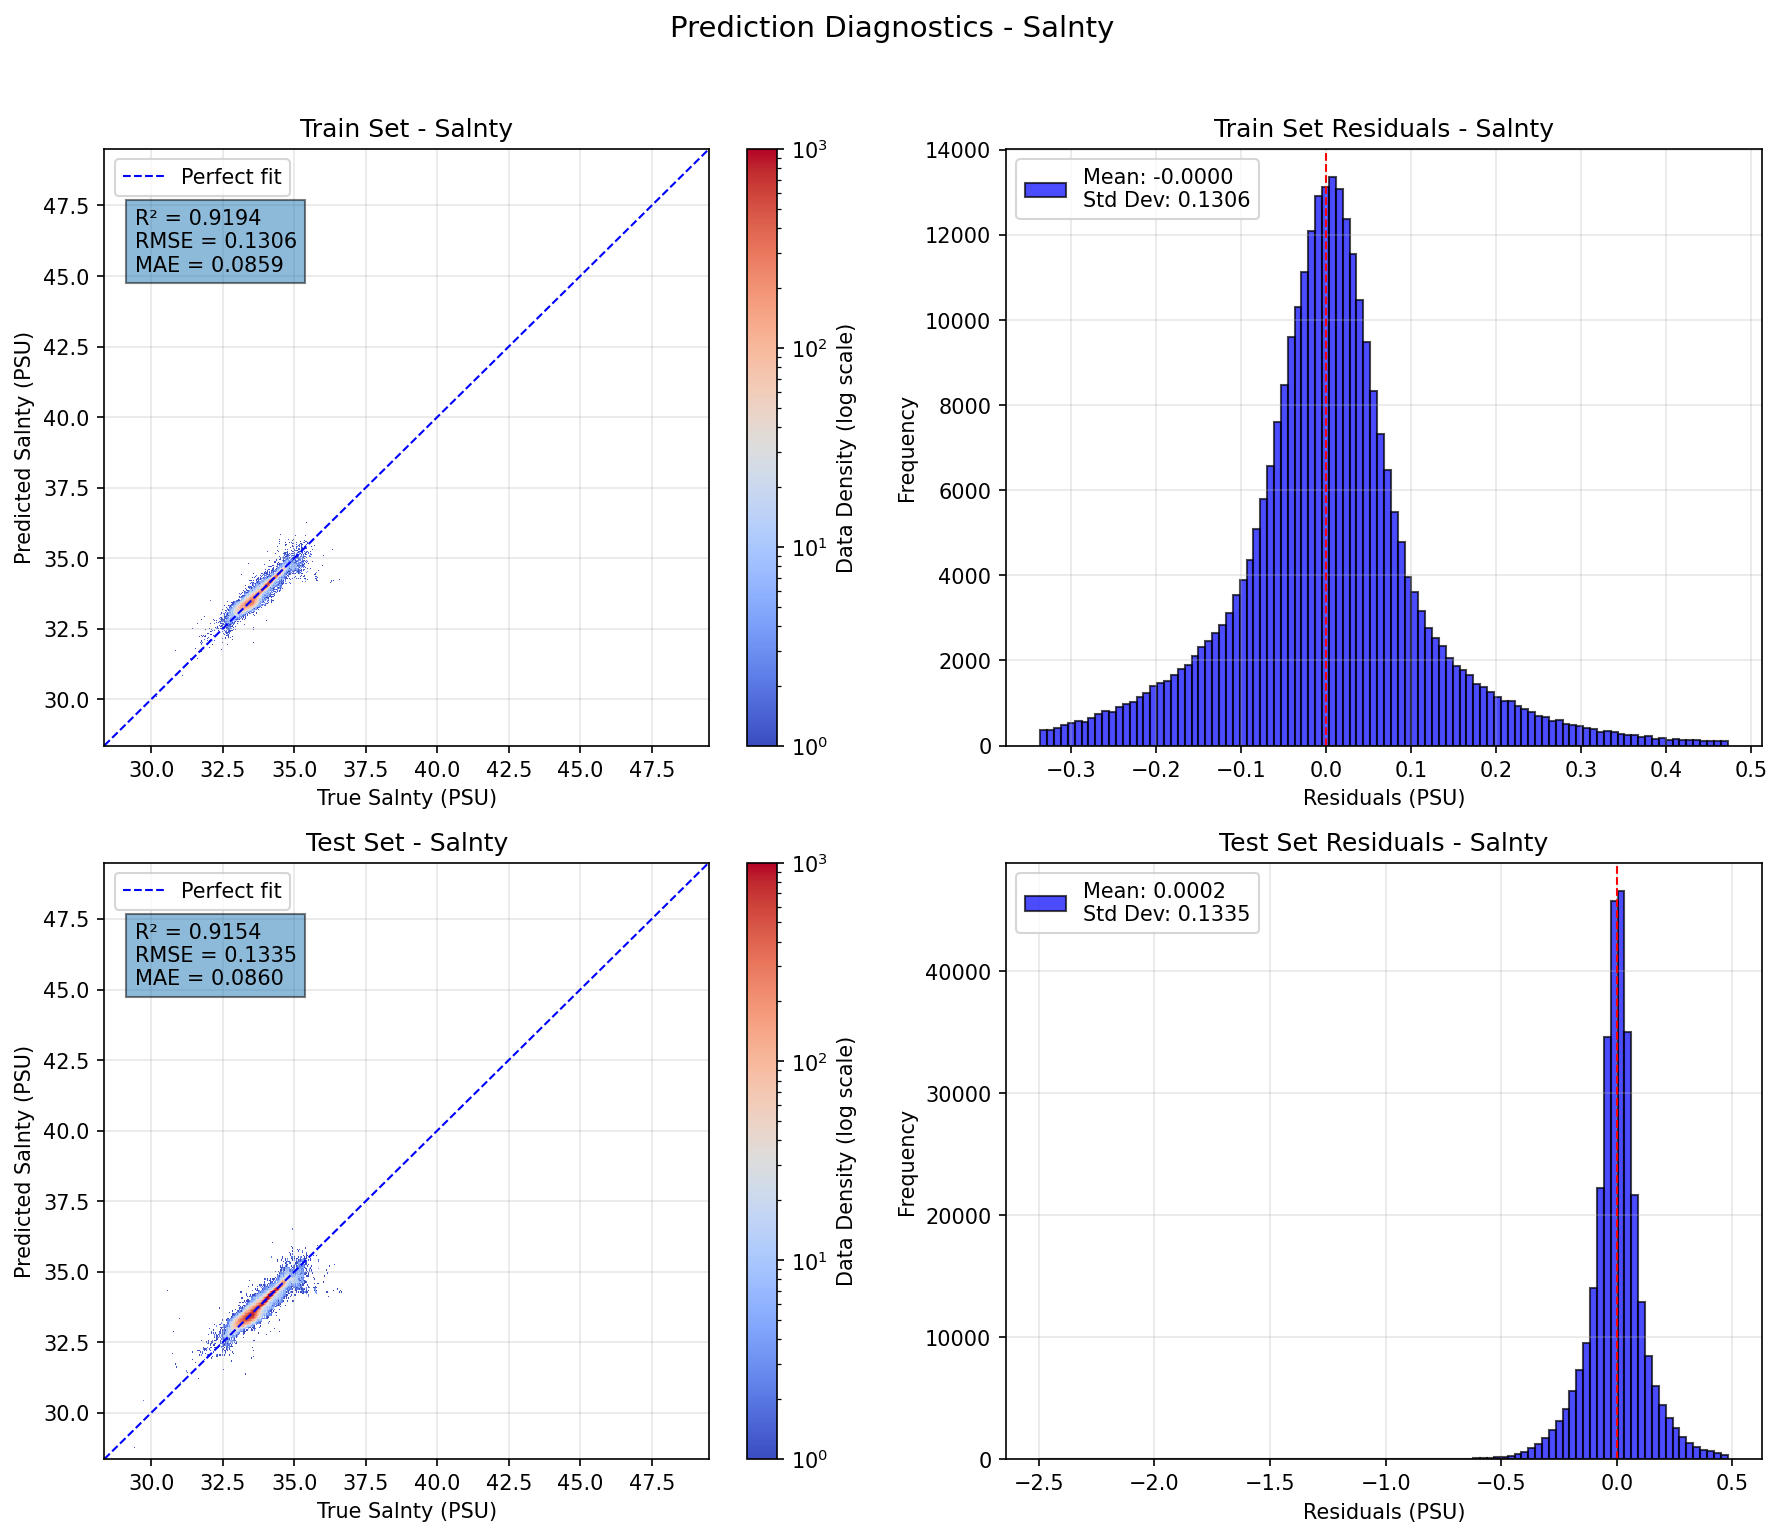

In [20]:
# Data preparation
X_train, X_test, y_train, y_test = prepare_data(df, features, targets,test_size= 0.5, random_state=42)

print(f"Shape of X_train : {np.shape(X_train)}")

y_pred_test, y_pred_train = kernel_train_predict(
    X_train, y_train, X_test,
    kernel_function='polynomial',
    n_components = 500,  
    degree=4,           # Polynomial degree
    gamma=1.0,          # Scaling factor for the polynomial term
    coef0=1.0           # Bias term
)
print(f"Mean Squared Error (Train): {mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, y_pred_test)}")
# Visualization
create_prediction_figure(y_train, y_pred_train, y_test, y_pred_test, targets)

## Radial Basis Function Kernel

Mean Squared Error (Train): 0.12121421987512569
Mean Squared Error (Test): 0.12284754094621318


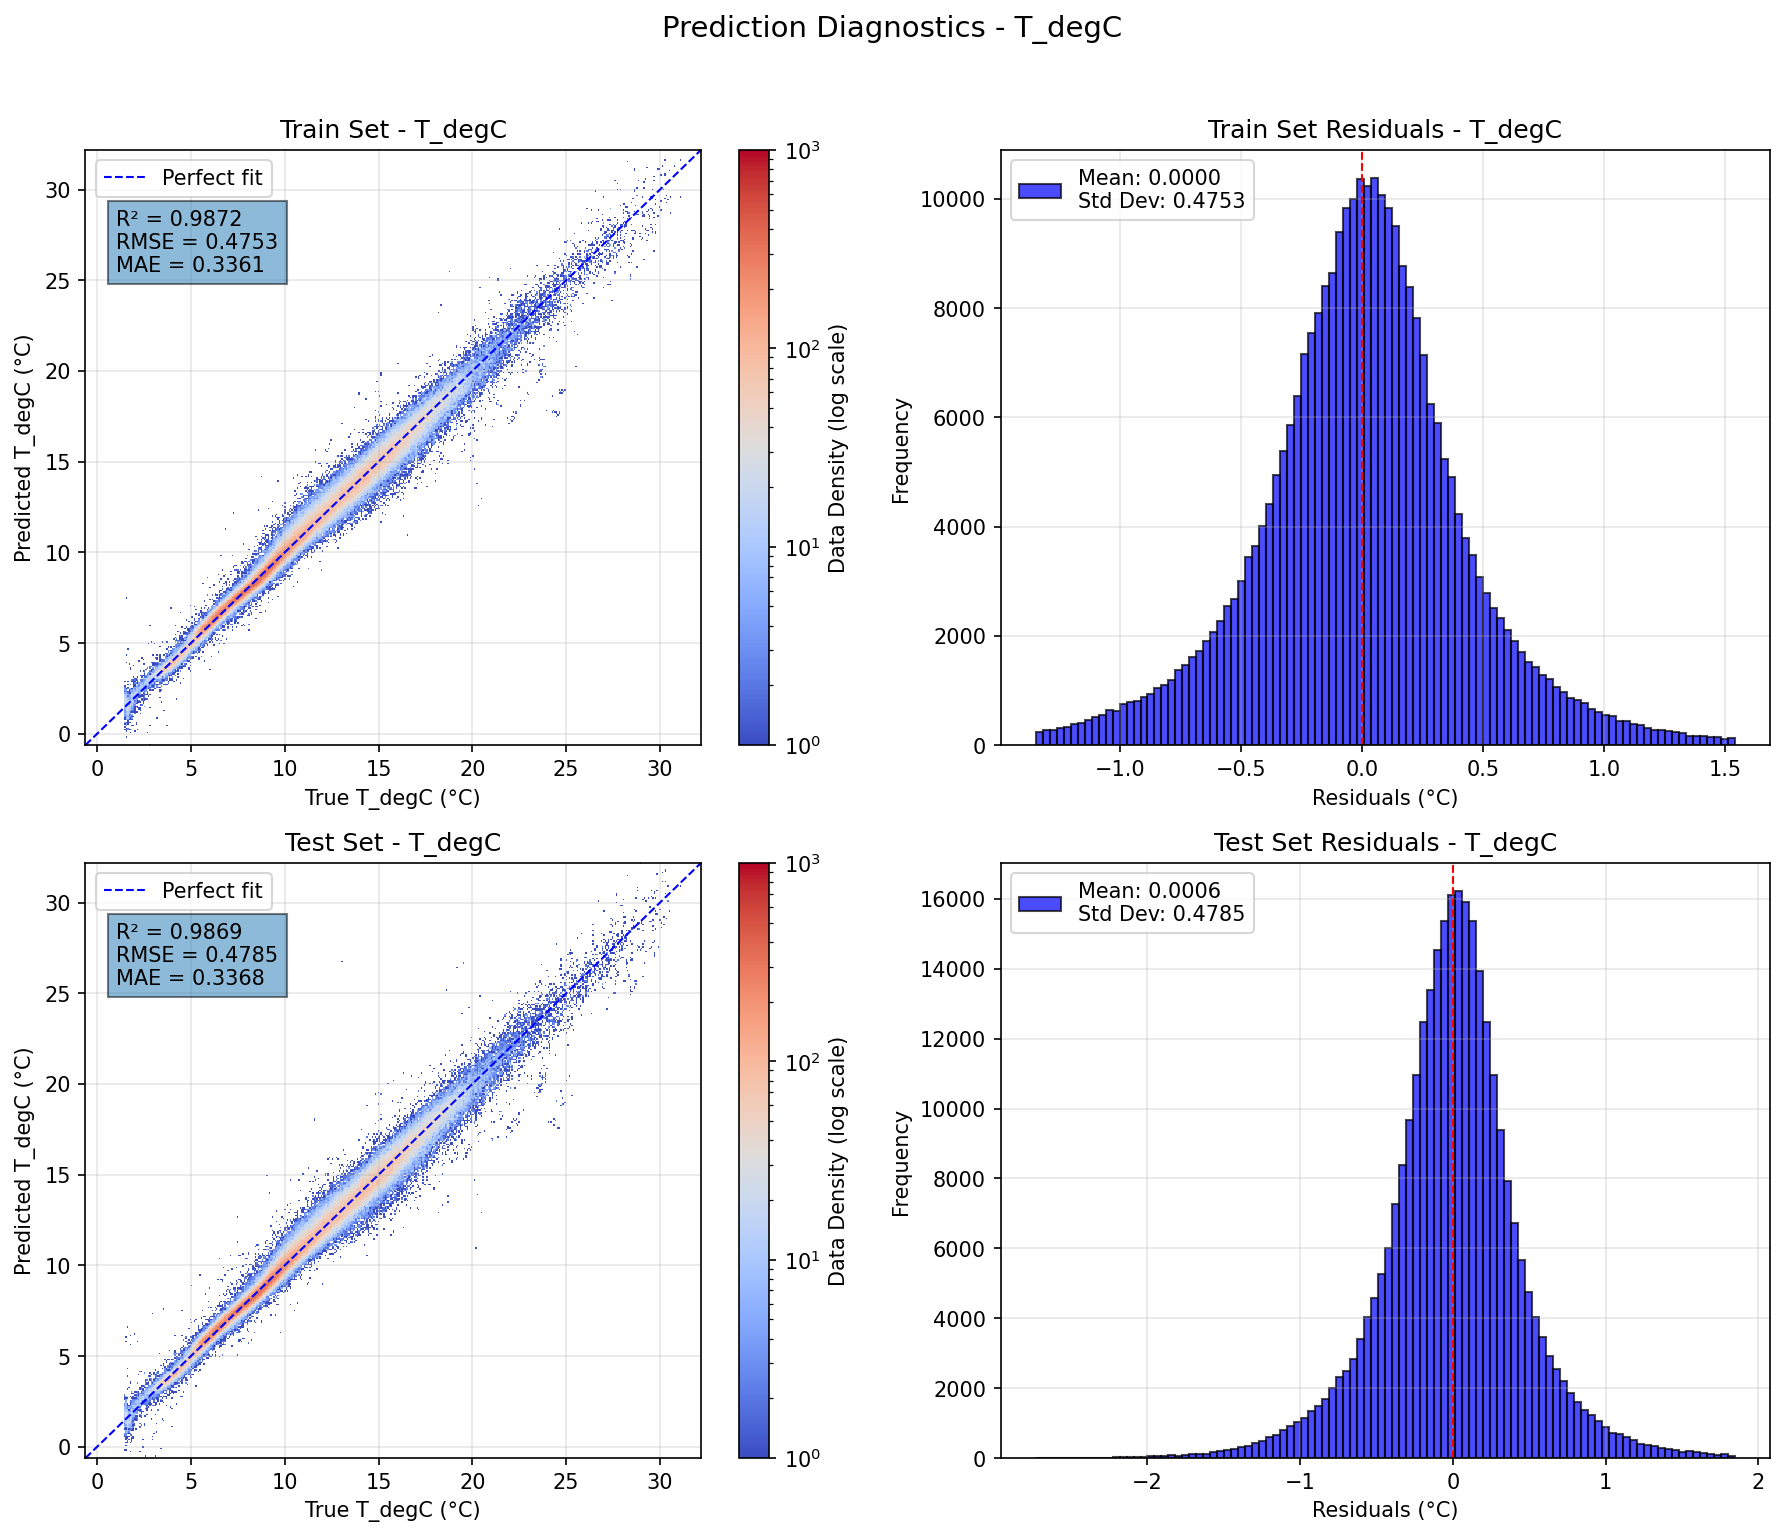

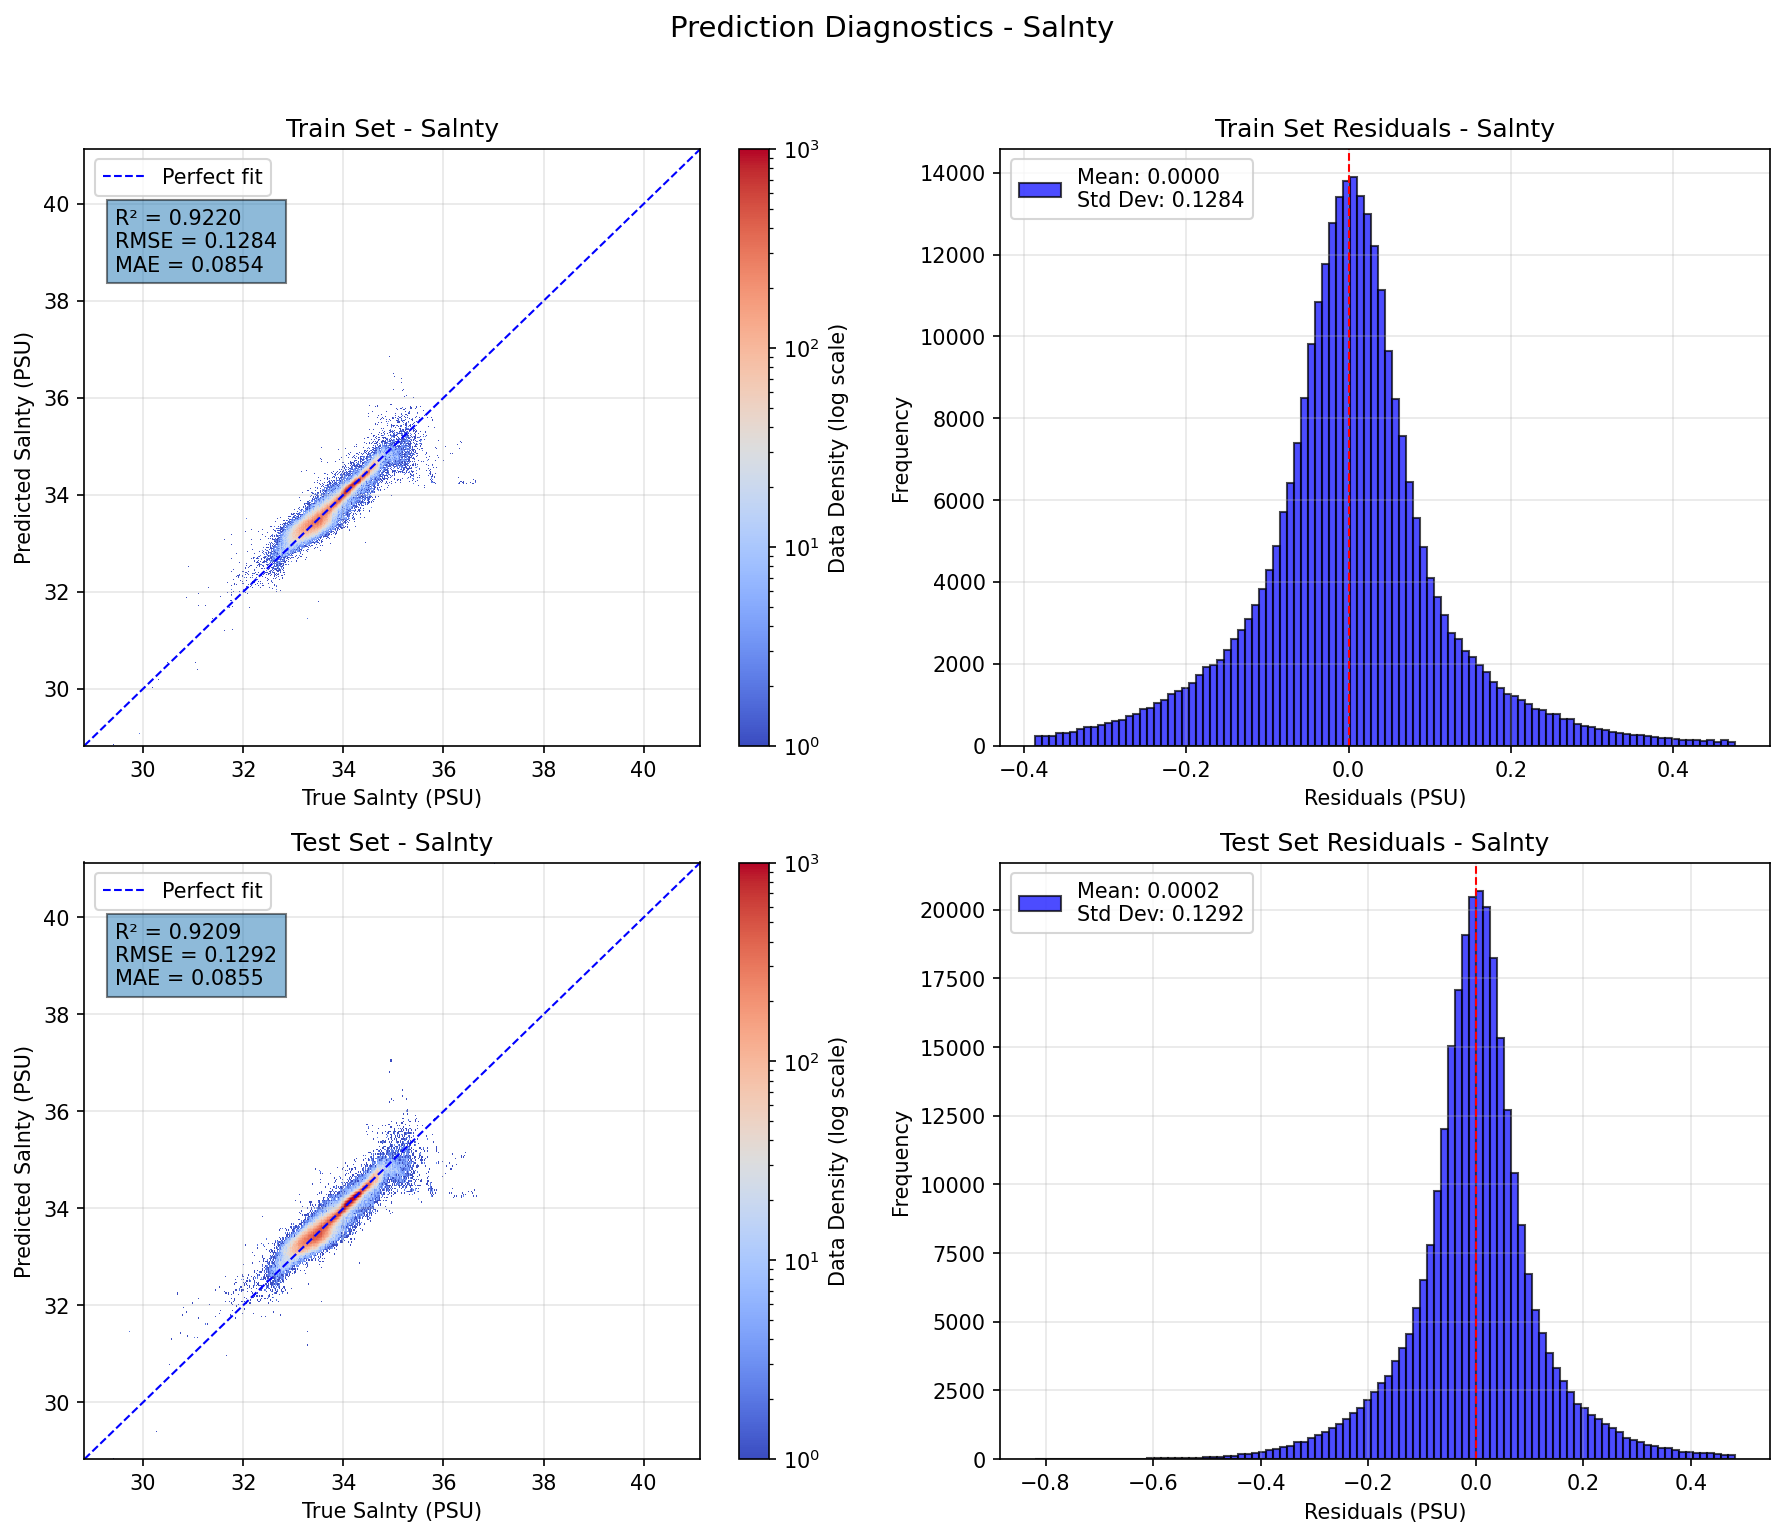

In [21]:
X_train, X_test, y_train, y_test = prepare_data(df, features, targets,test_size= 0.5, random_state=42)

# Nystroem RBF Regression
y_pred_test_nystroem, y_pred_train_nystroem = kernel_train_predict(
    X_train, y_train, X_test,
    kernel_function='rbf',
    n_components=500,  
    gamma=0.01,          # Scaling factor for the RBF kernel
)

print(f"Mean Squared Error (Train): {mean_squared_error(y_train, y_pred_train_nystroem)}")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, y_pred_test_nystroem)}")
# Visualization
create_prediction_figure(y_train, y_pred_train_nystroem, y_test, y_pred_test_nystroem, targets)

All Features present Mean Squared Error (Train): 0.12121421987512569
All Features present Mean Squared Error (Test): 0.12284754094621318
Exclude Wind Speed Mean Squared Error (Train): 0.10724318878900337
Exclude Wind Speed Mean Squared Error (Test): 0.10994807824046209
Exclude Bottom Depth Mean Squared Error (Train): 0.11985697832259602
Exclude Bottom Depth Mean Squared Error (Test): 0.12303383906204463
Exclude Quarter Mean Squared Error (Train): 0.11872913817213111
Exclude Quarter Mean Squared Error (Test): 0.1215223786578634
Exclude Spatial (Lat & Lon) Mean Squared Error (Train): 0.25924724106341746
Exclude Spatial (Lat & Lon) Mean Squared Error (Test): 0.28255774906681275
Exlude Wind Speed, Bottom Depth, Quarter Mean Squared Error (Train): 0.10775523780401346
Exlude Wind Speed, Bottom Depth, Quarter Mean Squared Error (Test): 0.11189883482355958


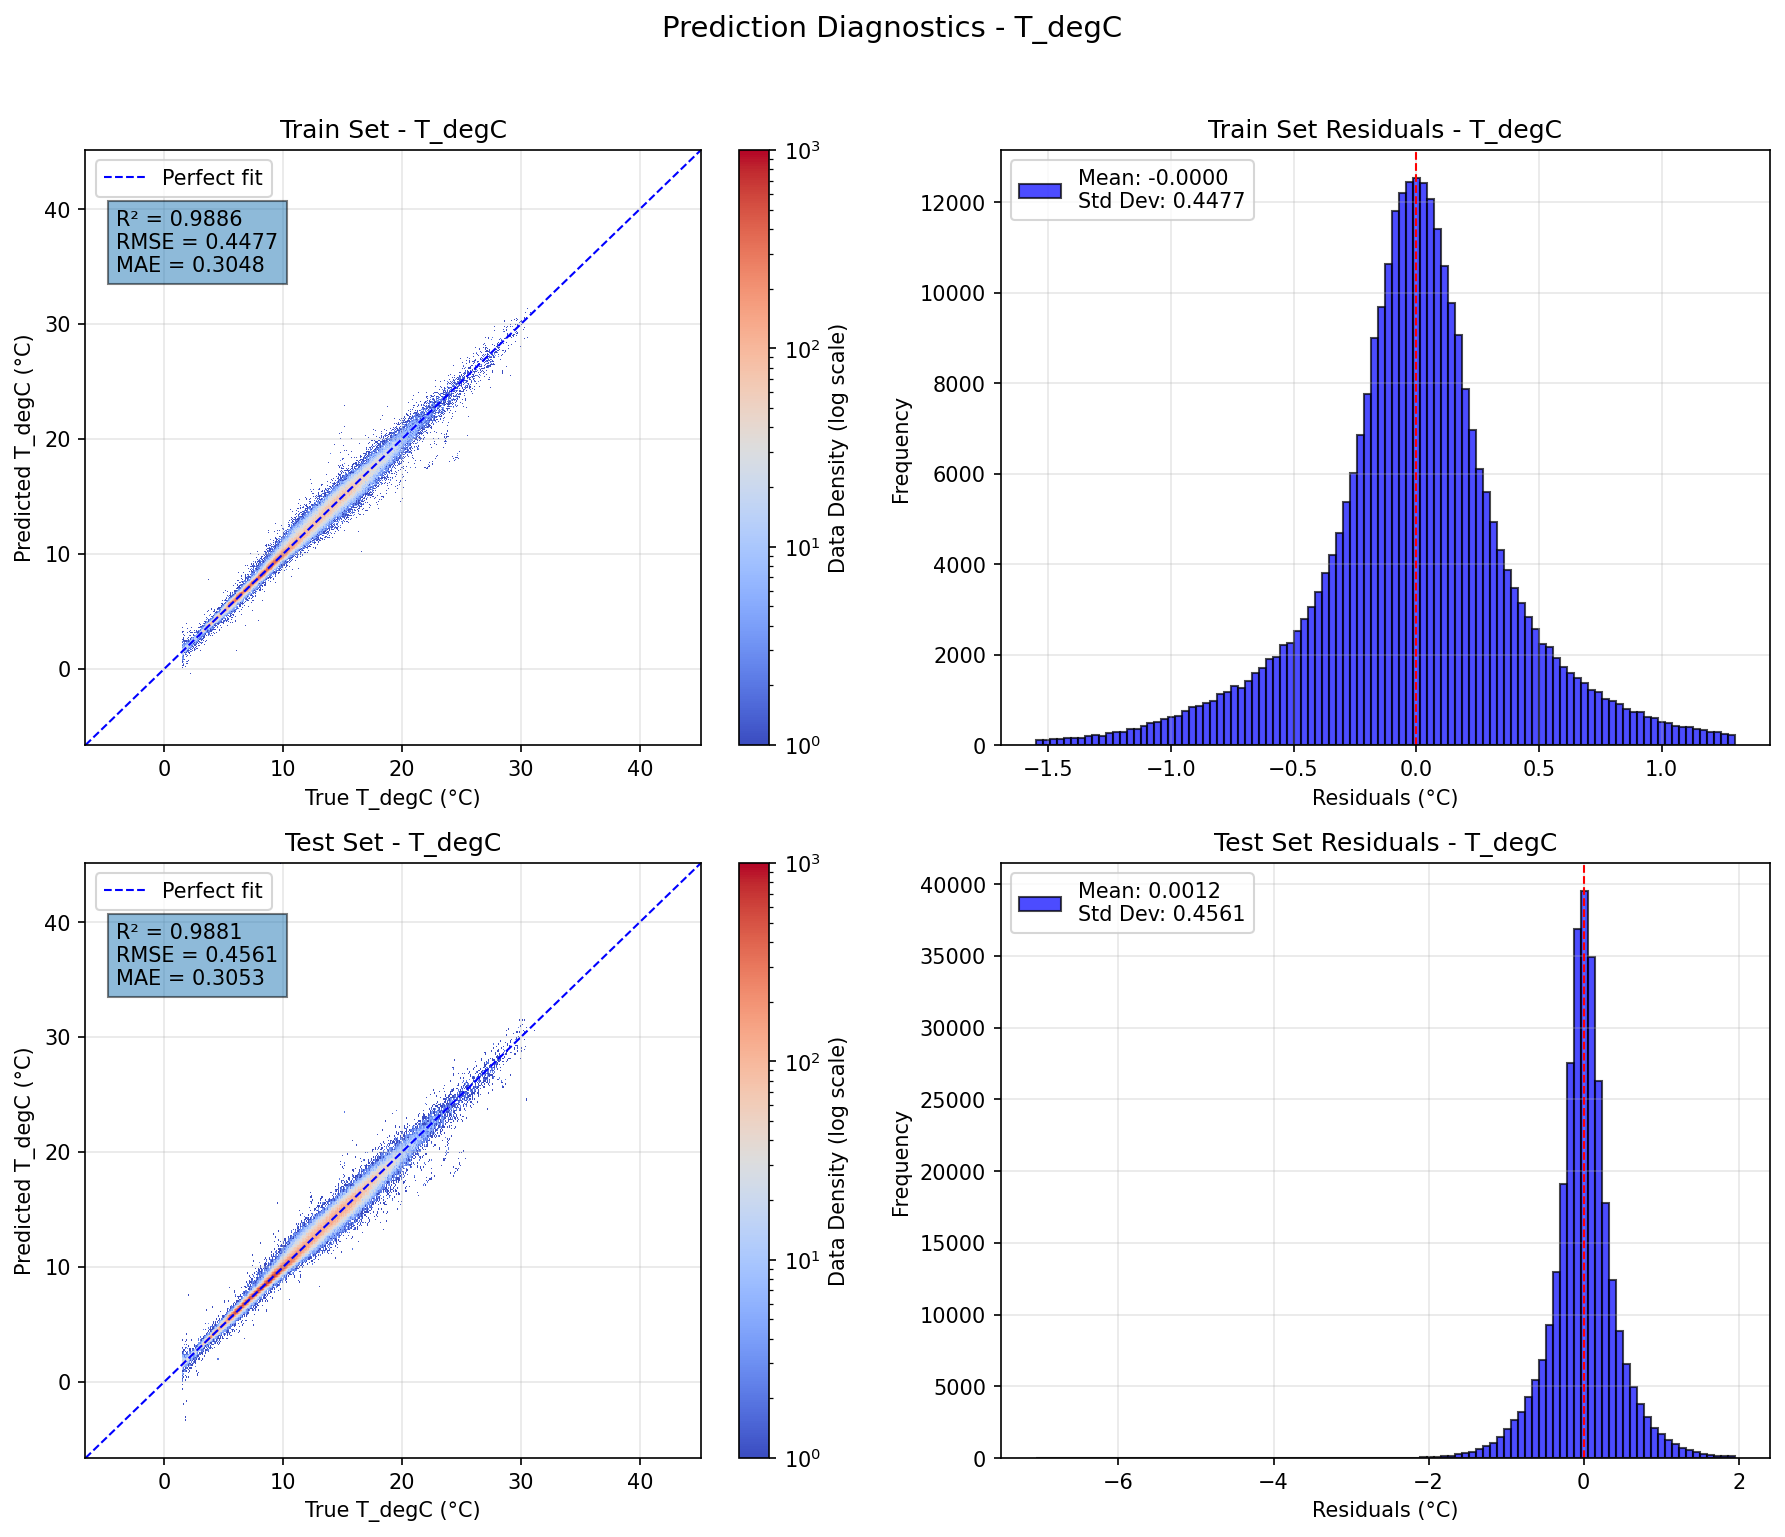

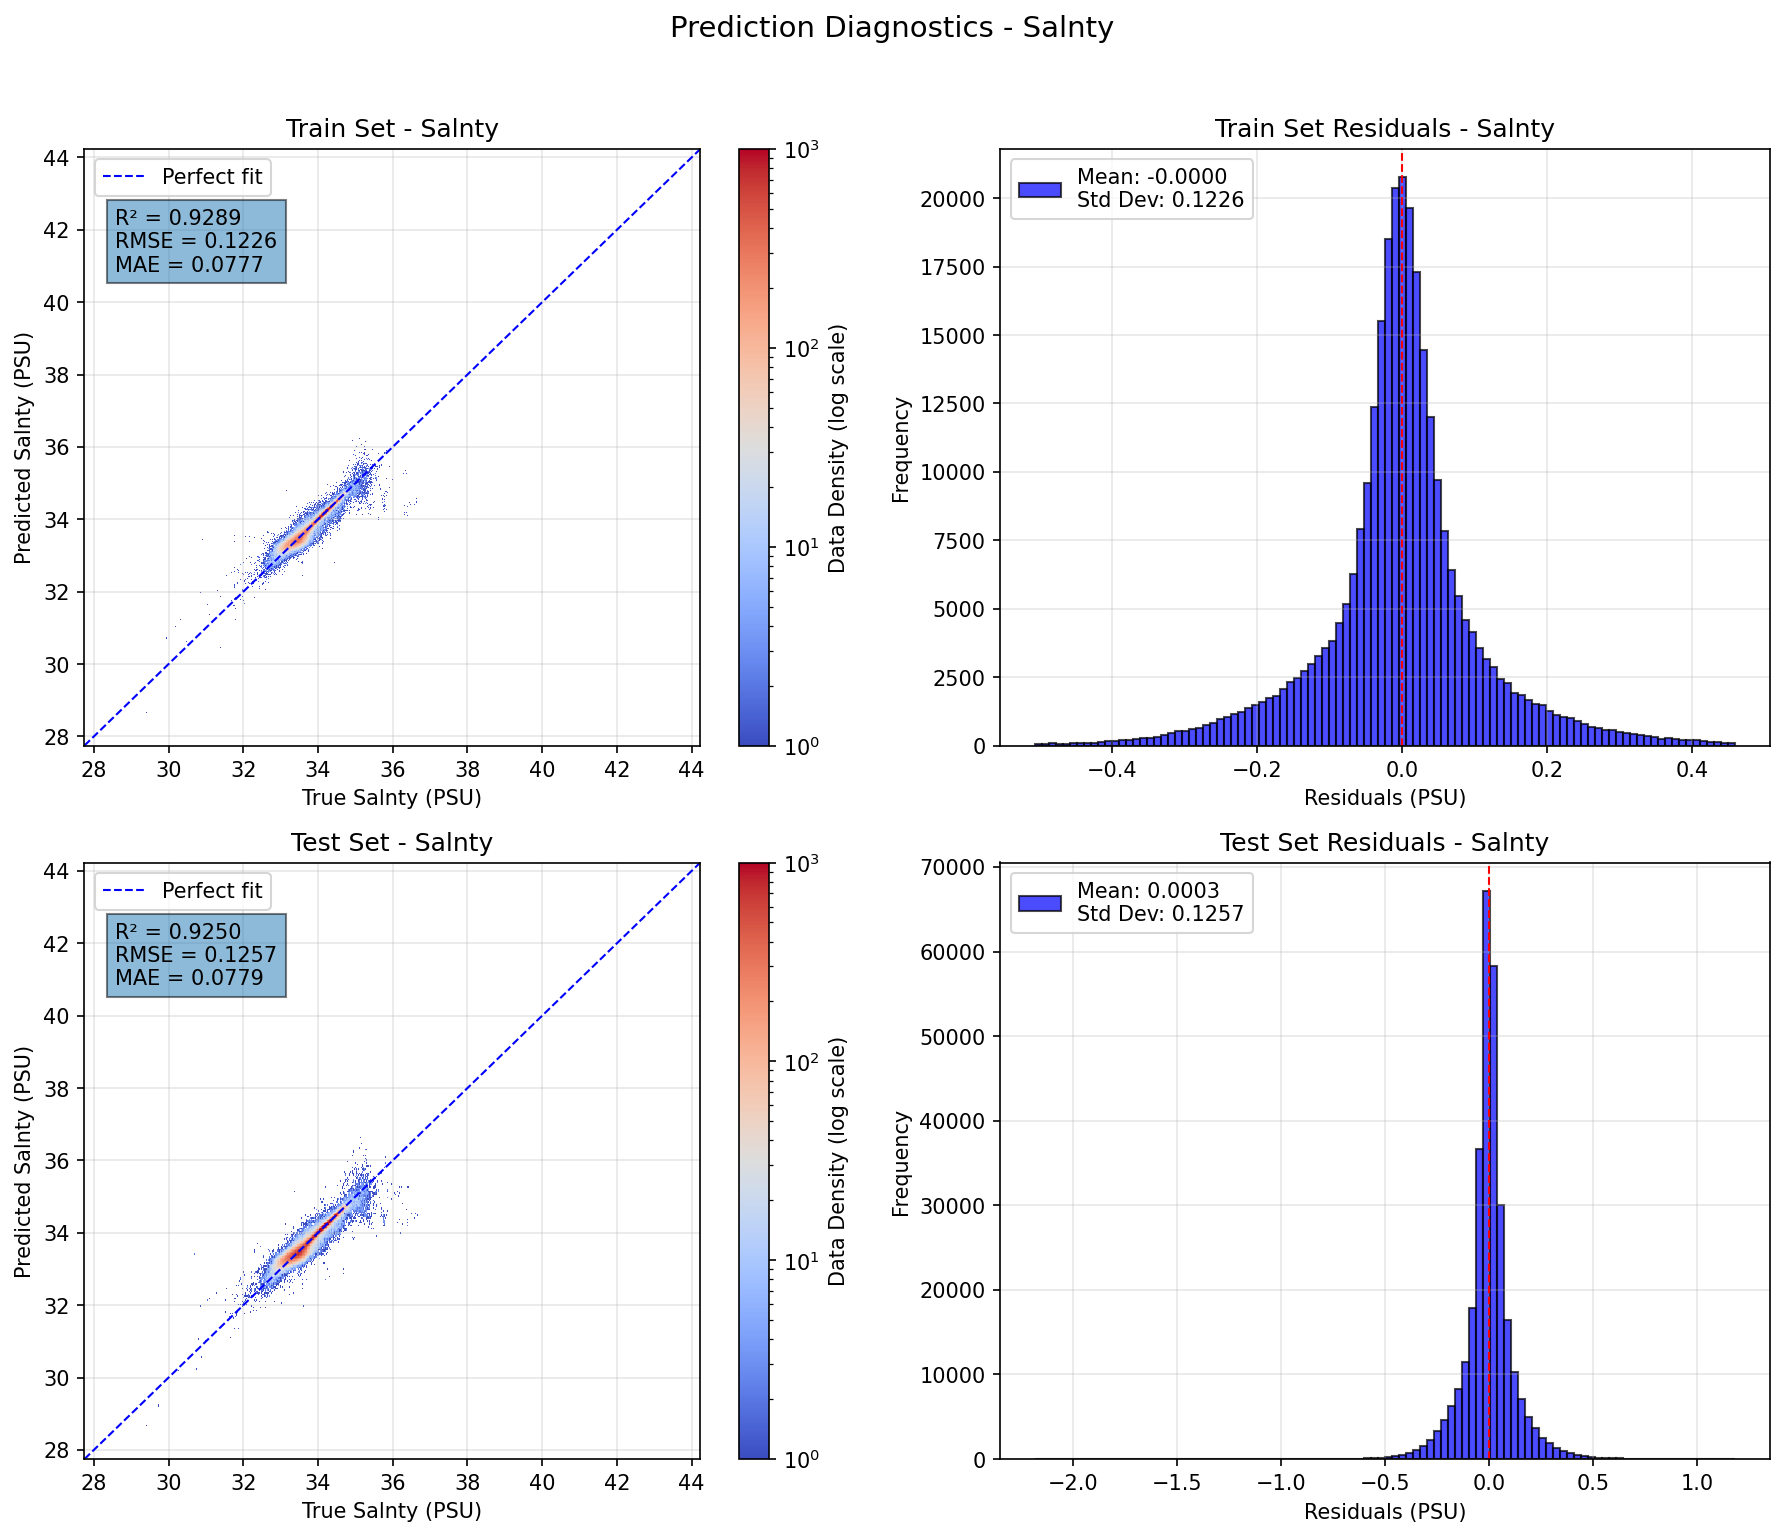

In [22]:
# Original feature set and targets
original_features = ['Depthm', 'O2ml_L', 'STheta', 'Bottom_D', 'Wind_Spd', 'Lat_Dec', 'Lon_Dec', 'Quarter']
targets = ["T_degC", "Salnty"]

# Define the cases you want to evaluate
cases = [
    ('All Features present', []),
    ('Exclude Wind Speed', ['Wind_Spd']),
    ('Exclude Bottom Depth', ['Bottom_D']),
    ('Exclude Quarter', ['Quarter']),
    ('Exclude Spatial (Lat & Lon)', ['Lat_Dec', 'Lon_Dec']),
    ('Exlude Wind Speed, Bottom Depth, Quarter', ['Wind_Spd', 'Bottom_D', 'Quarter']),
]

# Iterate through each case
for case_name, drop_features in cases:
    # Drop the specified features from the dataframe to create a case-specific dataset
    df_case = df.drop(columns=drop_features)
    
    # Define the features to use for this case (original features with the dropped ones removed)
    features_case = [feat for feat in original_features if feat not in drop_features]
    
    # Prepare the data (train-test split)
    X_train, X_test, y_train, y_test = prepare_data(df_case, features_case, targets, test_size=0.5, random_state=42)
    
    # Train the model using the radial basis function kernel method 
    y_pred_test, y_pred_train = kernel_train_predict(X_train, y_train, X_test, kernel_function="rbf", n_components=500, gamma=0.01)

    # Calculate Mean Squared Error for both training and test sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"{case_name} Mean Squared Error (Train): {mse_train}")
    print(f"{case_name} Mean Squared Error (Test): {mse_test}")
    
    # Create prediction figures to visualize the performance on the training and test sets
    if case_name == 'Exlude Wind Speed, Bottom Depth, Quarter':
        create_prediction_figure(y_train,y_pred_train, y_test, y_pred_test,targets)

# Comparison between Linear Regression and Mercer Kernel Methods

The Linear regression model demonstrated strong predicting performance on the CalCoFi dataset.For temperature and salinity predictions, the model achieved high accuracy, with a negligible bias $\approx 10^{-3}$ and residual standard deviation of respectively $\sigma_T = 0.7$ and $\sigma_S = 0.2$.

Given the large dataset $N = 606502$, the effects of different sizes of training set and test set was explored.Across all configurations, the model exhibited robust performance, with stable prediction errors, even with very small number of training data $N_{train}<100$.

Regularization techniques (Ridge and LASSO regression) yielded no significant improvement over standard linear regression. Cross-validation confirmed that the unregularized model did not overfit, as evidenced by nearly identical training and test errors. The simplicity of the linear model was not sophisticated enough to further improve the description of the data.

Kernel Regression (e.g., polynomial/RBF kernels) marginally improved prediction accuracy compared to the linear baseline, likely due to their capacity to model nonlinear relationships. But, contrary to expectations, the improvement was not due to the poorly linearly correlated features such as Wind Speed, Bottom Depth and Quarter which did not play a significant role in the linear regression fit. 

Instead, the performance metrics for radial basis function kernel linear regression improved when these features were removed.

Reference :

- https://calcofi.org/data/oceanographic-data/bottle-database/
- https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data
- https://scikit-learn.org/stable/index.html